In [1]:
#Import libraries required
import pandas as pd
import seaborn as sb
import os, glob, re
import numpy as np
import itertools
import matplotlib
import deeptools, math
import scipy as sp
import pybedtools as pbt
import pyBigWig as pbw
import concurrent.futures
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [112]:
sb.set(font_scale=2)
sb.set_style("white")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


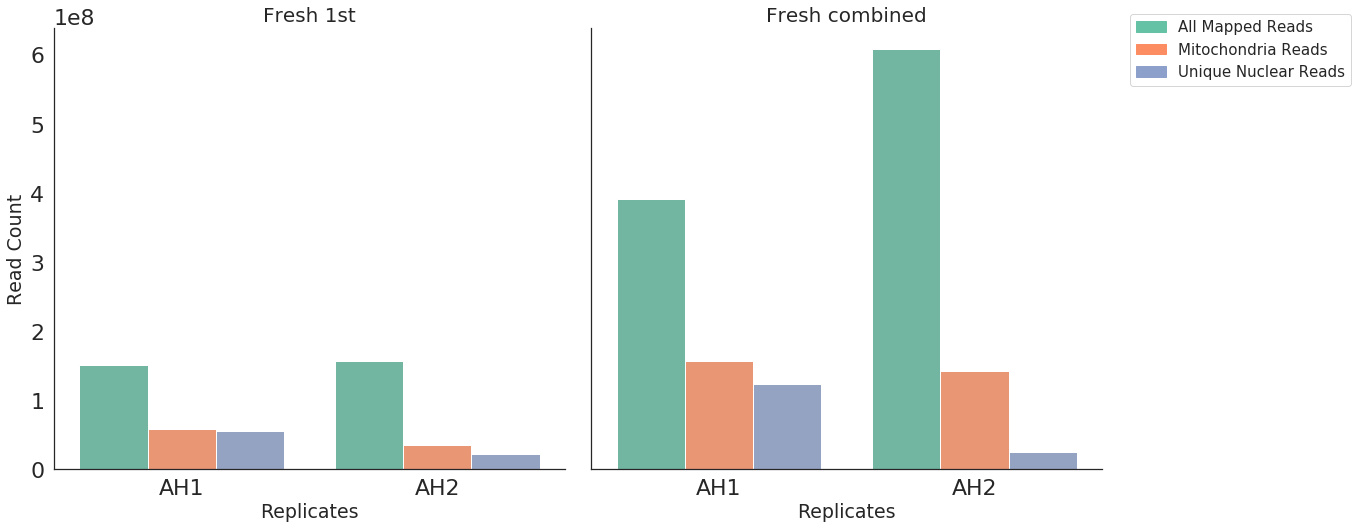

In [124]:
data = pd.read_csv("../Results/metrics/mapping_stats.csv", comment = "#", header = 0, index_col=False)
data = data.query("File.str.contains('Liver') & File.str.contains('Nuclei') & not (File.str.contains('0M')) & not (File.str.contains('AM'))")
temp = data['File'].str.split("_", expand = True)
temp[3].replace([None], 'All', inplace = True)
data['Tissue'] = temp[0]
data["Rep"] = temp[1]
data["Assay"] = temp[2]
data['Assay'] = data['Assay'].str.replace('NucleiFirst', 'Fresh 1st').replace('Nuclei', 'Fresh combined')
data['Rep'] = data['Rep'].str.replace('CP', 'AH2').replace('GS', 'AH1')
data['Reads'] = temp[3]
sub_data = data[["Tissue", "Rep", "Assay", "Reads", "Total(QC passed)", "Mapped(QC passed)", "Mapped%(QC passed)", "Duplicates(QC passed)"]]
sub_data['DupRate'] = sub_data['Duplicates(QC passed)'] / sub_data['Mapped(QC passed)']
sub_data = sub_data.sort_values(['Tissue', 'Rep', 'Assay', 'Reads'])
temp = sub_data
grid = sb.FacetGrid(temp, col = 'Assay', margin_titles=True, legend_out = True, height = 8)
colors = sb.color_palette('Set2')
hue_order = ['All', 'chrM', 'dedup']
hue_order_name = ['All Mapped Reads', 'Mitochondria Reads', 'Unique Nuclear Reads']
grid = grid.map(sb.barplot, 'Rep','Mapped(QC passed)', 'Reads', order = temp.Rep.unique(), hue_order = hue_order, palette = sb.color_palette('Set2', desat = 1))
#grid = grid.map(sb.barplot, 'Rep','Duplicates(QC passed)', 'Reads', order = temp.Rep.unique(), hue_order = hue_order, palette = sb.color_palette('Set2', desat = 1))
[plt.setp(ax.texts, text="") for ax in grid.axes.flat]
grid = grid.set_titles(row_template = '{row_name}', col_template = '{col_name}', size = 20)
grid = grid.set_ylabels('Read Count', size = 19)
grid = grid.set_xlabels('Replicates', size = 19)
name_to_color = {
    hue_order_name[0]: colors[0],
    hue_order_name[1]: colors[1],
    hue_order_name[2]: colors[2],
#    hue_order_name[3]: colors[3]
}
patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in name_to_color.items()]
plt.legend(loc='center right',bbox_to_anchor=(1.5,0.95), handles=patches, fontsize=15)
grid.savefig("Liver_CP_Nuclei_additionalRun.eps", format='eps')

In [3]:
data = pd.read_csv("../Results/metrics/mapping_stats.csv", comment = "#", header = 0, index_col=False)
data = data.query("not (File.str.contains('First')) & not (File.str.contains('0M'))")
temp = data['File'].str.split("_", expand = True)
temp[3].replace([None], 'All', inplace = True)
data['Tissue'] = temp[0]
data["Rep"] = temp[1]
data["Assay"] = temp[2]
#data['Assay'] = data['Assay'].str.replace('NucleiAM', 'NucV2').replace('Nuclei', 'NucV1').replace('TissueAM', 'TisV2').replace('Tissue', 'TisV1')
data['Reads'] = temp[3]
data.assign(Vendor = ['V2' if a.endswith('AM') else 'V1' for a in data['Assay']])

,File,Total(QC passed),Total(QC failed),Duplicates(QC passed),Mapped(QC passed),Mapped%(QC passed),Paired(QC passed),R1(QC passed),R2(QC passed),Properly paired(QC passed),...,Paired mapped(QC failed),Mate only(QC failed),Mate only%(QC failed),Mate mapped to diff chr(QC failed),Mate mapped to diff chr(mapQ>5)(QC failed),Tissue,Rep,Assay,Reads,Vendor
0,Lamina_CP_Tissue_chrM,3111401,0,2164652,3103969,99.76%,3096438,1554460,1556842,3065434,...,0,0,N/A,0,0,Lamina,CP,Tissue,chrM,V1
7,Liver_CP_Nuclei_filtered,418211461,0,392543460,418211461,100.00%,417326344,209393275,208818186,414915574,...,0,0,NaN,0,0,Liver,CP,Nuclei,filtered,V1
8,Liver_CP_Nuclei,613397491,0,566788935,609042144,99.29%,607796428,306628038,306628038,604455336,...,0,0,NaN,0,0,Liver,CP,Nuclei,All,V1
10,Liver_CP_Nuclei_dedup,25668001,0,0,25668001,100.00%,25582469,12834507,12833494,24028914,...,0,0,NaN,0,0,Liver,CP,Nuclei,dedup,V1
14,Liver_CP_TissueAM_chrM,6840516,0,5625074,6809845,99.55%,6779174,3420708,3419808,6774306,...,0,0,N/A,0,0,Liver,CP,TissueAM,chrM,V2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Liver_GS_Nuclei_chrM,157581481,0,152982633,157421762,99.90%,157259127,78814122,78764443,156779928,...,0,0,N/A,0,0,Liver,GS,Nuclei,chrM,V1
258,Liver_CP_TissueAM_filtered,59838078,0,6757324,59838078,100.00%,59540893,30038631,29799447,59437664,...,0,0,NaN,0,0,Liver,CP,TissueAM,filtered,V2
265,Liver_GS_Nuclei_filtered,214714925,0,90804736,214714925,100.00%,214152097,107569127,107145798,211090776,...,0,0,NaN,0,0,Liver,GS,Nuclei,filtered,V1
268,Lamina_GS_Nuclei_dedup,127769475,0,0,127769475,100.00%,127138280,64194150,63575325,126562396,...,0,0,NaN,0,0,Lamina,GS,Nuclei,dedup,V1


In [4]:
data = pd.read_csv("../Results/metrics/mapping_stats.csv", comment = "#", header = 0, index_col=False)
data = data.query("not (File.str.contains('0M'))")
temp = data['File'].str.split("_", expand = True)
temp[3].replace([None], 'All', inplace = True)
data['Tissue'] = temp[0]
data["Rep"] = temp[1]
data["Assay"] = temp[2]
#data['Assay'] = data['Assay'].str.replace('NucleiAM', 'NucV2').replace('Nuclei', 'NucV1').replace('TissueAM', 'TisV2').replace('Tissue', 'TisV1')
data['Reads'] = temp[3]
data.query("not (Tissue == 'Liver' and Assay == 'Nuclei')")

,File,Total(QC passed),Total(QC failed),Duplicates(QC passed),Mapped(QC passed),Mapped%(QC passed),Paired(QC passed),R1(QC passed),R2(QC passed),Properly paired(QC passed),...,Properly paired%(QC failed),Paired mapped(QC failed),Mate only(QC failed),Mate only%(QC failed),Mate mapped to diff chr(QC failed),Mate mapped to diff chr(mapQ>5)(QC failed),Tissue,Rep,Assay,Reads
0,Lamina_CP_Tissue_chrM,3111401,0,2164652,3103969,99.76%,3096438,1554460,1556842,3065434,...,N/A,0,0,N/A,0,0,Lamina,CP,Tissue,chrM
14,Liver_CP_TissueAM_chrM,6840516,0,5625074,6809845,99.55%,6779174,3420708,3419808,6774306,...,N/A,0,0,N/A,0,0,Liver,CP,TissueAM,chrM
20,Lamina_GS_Nuclei_chrM,975606,0,446926,972622,99.69%,969599,485092,490475,957364,...,N/A,0,0,N/A,0,0,Lamina,GS,Nuclei,chrM
41,Liver_GS_NucleiFirst,152114579,0,85336512,151499613,99.60%,151062506,76036611,76036611,149420236,...,NaN,0,0,NaN,0,0,Liver,GS,NucleiFirst,All
42,Liver_CP_Tissue_dedup,95693559,0,0,95693559,100.00%,95467586,47955122,47738437,94258930,...,NaN,0,0,NaN,0,0,Liver,CP,Tissue,dedup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Liver_CP_NucleiAM_filtered,76771542,0,13332071,76771542,100.00%,76098067,38675806,38095736,76024726,...,NaN,0,0,NaN,0,0,Liver,CP,NucleiAM,filtered
252,Liver_CP_NucleiFirst,156892495,0,126148727,156245759,99.59%,155839948,78423860,78423860,154851880,...,NaN,0,0,NaN,0,0,Liver,CP,NucleiFirst,All
253,Liver_GS_TissueAM_chrM,9379428,0,8129996,9361437,99.81%,9343446,4690467,4688961,9331358,...,N/A,0,0,N/A,0,0,Liver,GS,TissueAM,chrM
258,Liver_CP_TissueAM_filtered,59838078,0,6757324,59838078,100.00%,59540893,30038631,29799447,59437664,...,NaN,0,0,NaN,0,0,Liver,CP,TissueAM,filtered


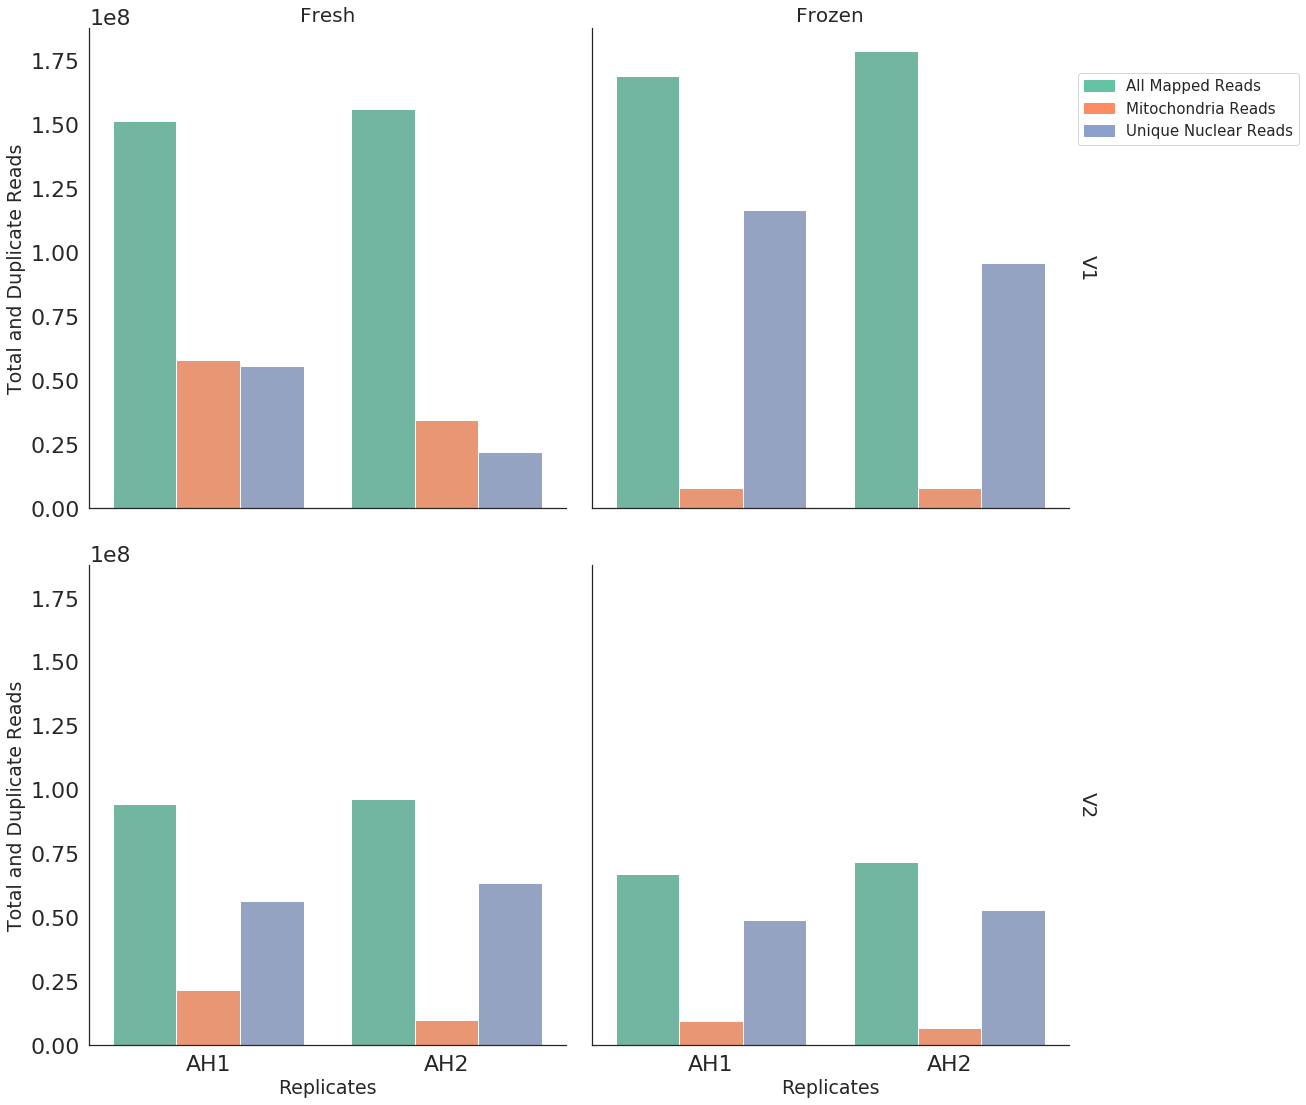

In [127]:
data = pd.read_csv("../Results/metrics/mapping_stats.csv", comment = "#", header = 0, index_col=False)
data = data.query("not (File.str.contains('0M'))")
temp = data['File'].str.split("_", expand = True)
temp[3].replace([None], 'All', inplace = True)
data['Tissue'] = temp[0]
data["Rep"] = temp[1]
data["Assay"] = temp[2]
#data['Assay'] = data['Assay'].str.replace('NucleiAM', 'NucV2').replace('Nuclei', 'NucV1').replace('TissueAM', 'TisV2').replace('Tissue', 'TisV1')
data['Reads'] = temp[3]
data = data.query("not (Tissue == 'Liver' and Assay == 'Nuclei')")
data['Assay'] = data['Assay'].str.replace('NucleiFirst', 'Nuclei').str.replace('Nuclei', 'Fresh')
data = data.assign(Vendor = ['V2' if a.endswith('AM') else 'V1' for a in data['Assay']])
data['Assay'] = data['Assay'].str.replace('AM', '')
data['Assay'] = data['Assay'].str.replace('Tissue', 'Frozen')
data['Rep'] = data['Rep'].str.replace('CP', 'AH2').replace('GS', 'AH1')
sub_data = data[["Tissue", "Rep", "Assay", "Reads", "Vendor", "Total(QC passed)", "Mapped(QC passed)", "Mapped%(QC passed)", "Duplicates(QC passed)"]]
sub_data['DupRate'] = sub_data['Duplicates(QC passed)'] / sub_data['Mapped(QC passed)']
sub_data = sub_data.sort_values(['Tissue', 'Rep', 'Assay', 'Reads', 'Vendor'])
temp = sub_data[sub_data['Tissue'] == 'Liver']
grid = sb.FacetGrid(temp, col = 'Assay', row = 'Vendor', margin_titles=True, legend_out = True, height = 8)
colors = sb.color_palette('Set2')
hue_order = ['All', 'chrM', 'dedup']
hue_order_name = ['All Mapped Reads', 'Mitochondria Reads', 'Unique Nuclear Reads']
grid = grid.map(sb.barplot, 'Rep','Mapped(QC passed)', 'Reads', order = temp.Rep.unique(), hue_order = hue_order, palette = sb.color_palette('Set2', desat = 1))
#grid = grid.map(sb.barplot, 'Rep','Duplicates(QC passed)', 'Reads', order = temp.Rep.unique(), hue_order = hue_order, palette = sb.color_palette('Set2', desat = 1))
[plt.setp(ax.texts, text="") for ax in grid.axes.flat]
grid = grid.set_titles(row_template = '{row_name}', col_template = '{col_name}', size = 20)
grid = grid.set_ylabels('Total and Duplicate Reads', size = 19)
grid = grid.set_xlabels('Replicates', size = 19)
#grid.fig.suptitle('Reads')
name_to_color = {
    hue_order_name[0]: colors[0],
    hue_order_name[1]: colors[1],
    hue_order_name[2]: colors[2],
#    hue_order_name[3]: colors[3]
}
patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in name_to_color.items()]
plt.legend(loc='center right',bbox_to_anchor=(1.5,1.95), handles=patches, fontsize=15)
grid.savefig("Liver.svg", format='svg', ppi=300)

## PCA plot

### Liver

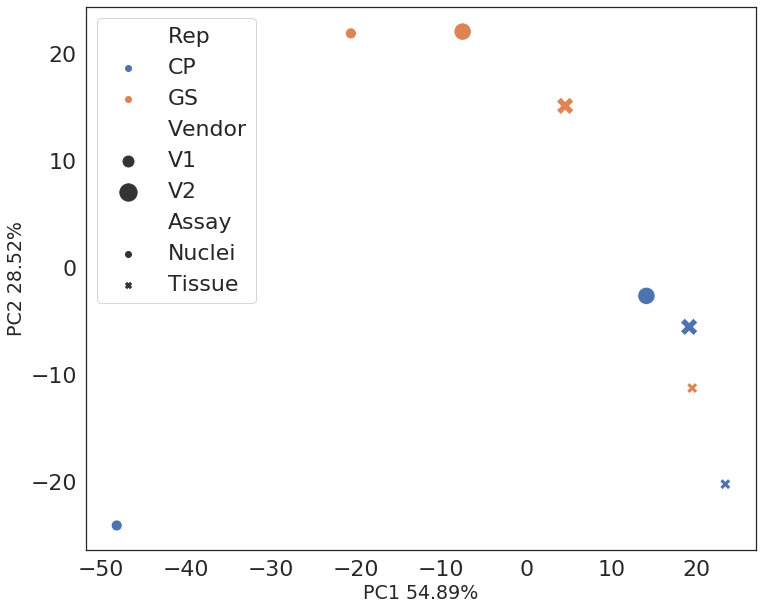

In [15]:
pca_tab = pd.read_csv("../Results/figures/PCA_log2_Liver.tab", sep = '\t')
eigens = pca_tab['Eigenvalue']
pca_tab = pca_tab.set_index(['Component']).drop(['Eigenvalue'], axis=1)
pca_tab = pca_tab.transpose()
pca_tab = pca_tab.reset_index()
pca_tab['Tissue'] = pca_tab['index'].str.split('_', expand = True)[0]
pca_tab['Rep'] = pca_tab['index'].str.split('_', expand = True)[1]
pca_tab['Assay'] = pca_tab['index'].str.split('_', expand = True)[2]
#pca_tab['Assay'] = pca_tab['Assay'].str.replace('NucleiAM', 'NucV2').replace('Nuclei', 'NucV1').replace('TissueAM', 'TisV2').replace('Tissue', 'TisV1')
pca_tab = pca_tab.assign(Vendor = ['V2' if a.endswith('AM') else 'V1' for a in pca_tab['Assay']])
pca_tab['Assay'] = pca_tab['Assay'].replace('NucleiAM', 'Nuclei').replace('TissueAM', 'Tissue')
pca_tab['Count'] = pca_tab['index'].str.split('_', expand = True)[3]
pca_tab['Count'] = pca_tab['Count'].fillna('OG')
pca_tab.columns = pca_tab.columns.astype(str)
fig, ax = plt.subplots(figsize = (12,10))
p = sb.scatterplot(data = pca_tab[pca_tab['Count'] == 'OG'], x = '1', y = '2', hue = 'Rep', style = 'Assay', size = 'Vendor', ax = ax, sizes = [120, 300], legend = 'brief')
p = plt.xlabel("PC1 {}%".format(round(eigens[0] * 100 / eigens.sum(), 2)), size  = 19)
p = plt.ylabel("PC2 {}%".format(round(eigens[1] * 100 / eigens.sum(), 2)), size = 19)

### Lamina

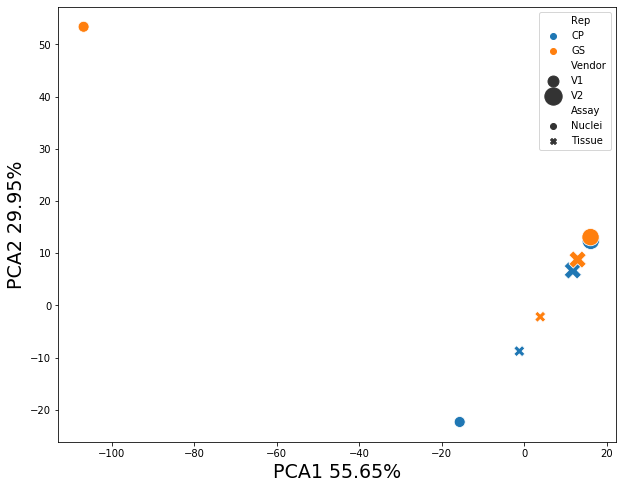

In [3]:
pca_tab = pd.read_csv("../Results/figures/PCA_log2_Lamina.tab", sep = '\t')
eigens = pca_tab['Eigenvalue']
pca_tab = pca_tab.set_index(['Component']).drop(['Eigenvalue'], axis=1)
pca_tab = pca_tab.transpose()
pca_tab = pca_tab.reset_index()
pca_tab['Tissue'] = pca_tab['index'].str.split('_', expand = True)[0]
pca_tab['Rep'] = pca_tab['index'].str.split('_', expand = True)[1]
pca_tab['Assay'] = pca_tab['index'].str.split('_', expand = True)[2]
pca_tab = pca_tab.assign(Vendor = ['V2' if a.endswith('AM') else 'V1' for a in pca_tab['Assay']])
pca_tab['Assay'] = pca_tab['Assay'].replace('NucleiAM', 'Nuclei').replace('TissueAM', 'Tissue')
pca_tab['Count'] = pca_tab['index'].str.split('_', expand = True)[3]
pca_tab['Count'] = pca_tab['Count'].fillna('OG')
pca_tab.columns = pca_tab.columns.astype(str)
fig, ax = plt.subplots(figsize = (10,8))
p = sb.scatterplot(data = pca_tab[pca_tab['Count'] == 'OG'], x = '1', y = '2', hue = 'Rep', style = 'Assay',  size = 'Vendor', ax = ax, sizes = [120, 300], s = 300)
p = plt.xlabel("PCA1 {}%".format(round(eigens[0] * 100 / eigens.sum(), 2)), size  = 19)
p = plt.ylabel("PCA2 {}%".format(round(eigens[1] * 100 / eigens.sum(), 2)), size = 19)

In [5]:
pca_tab['Assay'] + pca_tab['Vendor']

0     NucleiV1
1     NucleiV1
2     NucleiV1
3     NucleiV1
4     TissueV1
        ...   
59    NucleiV2
60    TissueV2
61    TissueV2
62    TissueV2
63    TissueV2
Length: 64, dtype: object

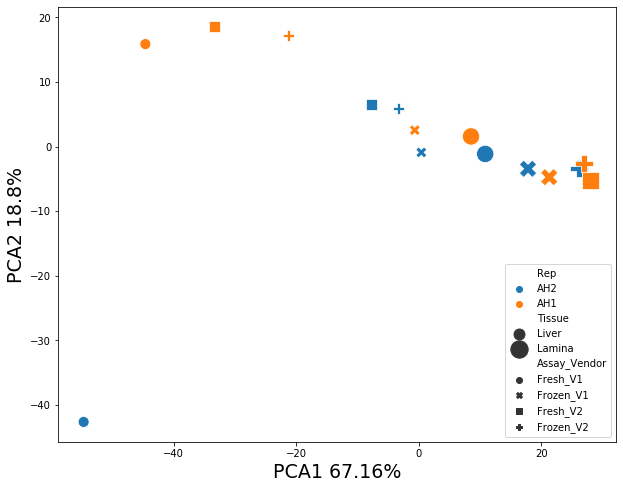

In [13]:
pca_tab = pd.read_csv("../Results/figures/PCA_log2.tab", sep = '\t')
eigens = pca_tab['Eigenvalue']
pca_tab = pca_tab.set_index(['Component']).drop(['Eigenvalue'], axis=1)
pca_tab = pca_tab.transpose()
pca_tab = pca_tab.reset_index()
pca_tab['Tissue'] = pca_tab['index'].str.split('_', expand = True)[0]
pca_tab['Rep'] = pca_tab['index'].str.split('_', expand = True)[1]
pca_tab['Assay'] = pca_tab['index'].str.split('_', expand = True)[2]
pca_tab = pca_tab.assign(Vendor = ['V2' if a.endswith('AM') else 'V1' for a in pca_tab['Assay']])
pca_tab['Assay'] = pca_tab['Assay'].replace('NucleiAM', 'Nuclei').replace('TissueAM', 'Tissue').replace('Nuclei', 'Fresh').replace('Tissue', 'Frozen')
pca_tab['Count'] = pca_tab['index'].str.split('_', expand = True)[3]
pca_tab['Count'] = pca_tab['Count'].fillna('OG')
pca_tab['Assay_Vendor'] = pca_tab['Assay'] + '_' + pca_tab['Vendor']
pca_tab['Rep'] = pca_tab['Rep'].str.replace('CP', 'AH2').replace('GS', 'AH1')
pca_tab.columns = pca_tab.columns.astype(str)
fig, ax = plt.subplots(figsize = (10,8))
sb.scatterplot(data = pca_tab[pca_tab['Count'] == 'OG'], x = '1', y = '2', hue = 'Rep', style = 'Assay_Vendor',  size = 'Tissue', ax = ax, sizes = [120, 300], s = 300)
plt.xlabel("PCA1 {}%".format(round(eigens[0] * 100 / eigens.sum(), 2)), size  = 19)
plt.ylabel("PCA2 {}%".format(round(eigens[1] * 100 / eigens.sum(), 2)), size = 19)
fig.savefig('PCA.svg', format='svg', ppi=300)

## Correlation plot

In [16]:
depth_data = pd.read_csv('depth_data.csv', index_col = 0)

In [18]:
corr_data = depth_data[list(filter(lambda x: not x.endswith('0M') and 'Liver' in x, list(depth_data.columns)))]
corr_data.columns = pd.Series(corr_data.columns).str.replace('NucleiAM', 'NucVen2').str.replace('Nuclei', 'NucVen1').str.replace('TissueAM', 'TisVen2').str.replace('Tissue', 'TisVen1').str.replace('CP', 'AH2').str.replace('GS', 'AH1')
corr_data

,Liver_AH1_TisVen1,Liver_AH1_NucVen1,Liver_AH2_NucVen2,Liver_AH1_TisVen2,Liver_AH2_TisVen2,Liver_AH2_TisVen1,Liver_AH1_NucVen2,Liver_AH2_NucVen1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
53778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Liver

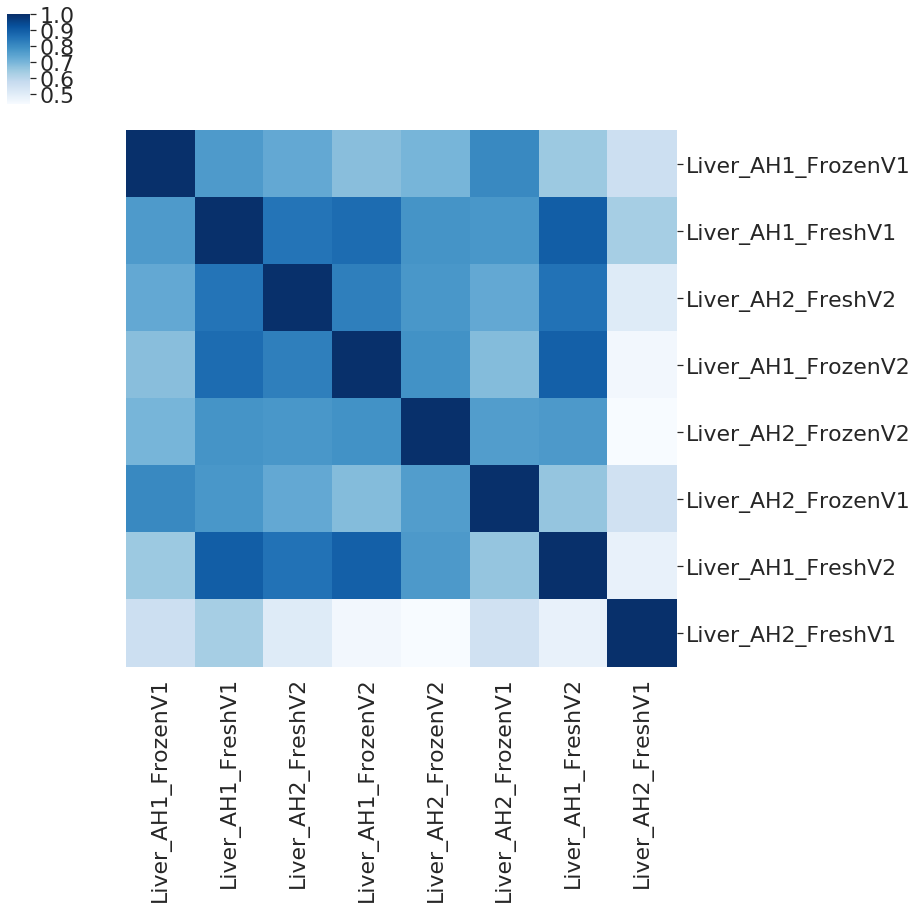

In [22]:
corr_data = depth_data[list(filter(lambda x: not x.endswith('0M') and 'Liver' in x, list(depth_data.columns)))]
corr_data.columns = pd.Series(corr_data.columns).str.replace('NucleiAM', 'FreshV2').str.replace('Nuclei', 'FreshV1').str.replace('TissueAM', 'FrozenV2').str.replace('Tissue', 'FrozenV1').str.replace('CP', 'AH2').str.replace('GS', 'AH1')
sb.clustermap(data=corr_data.corr(), annot=False, cmap = "Blues", method = 'complete', metric = 'pearson', row_cluster = False, col_cluster = False, figsize=(12,12))

### Lamina

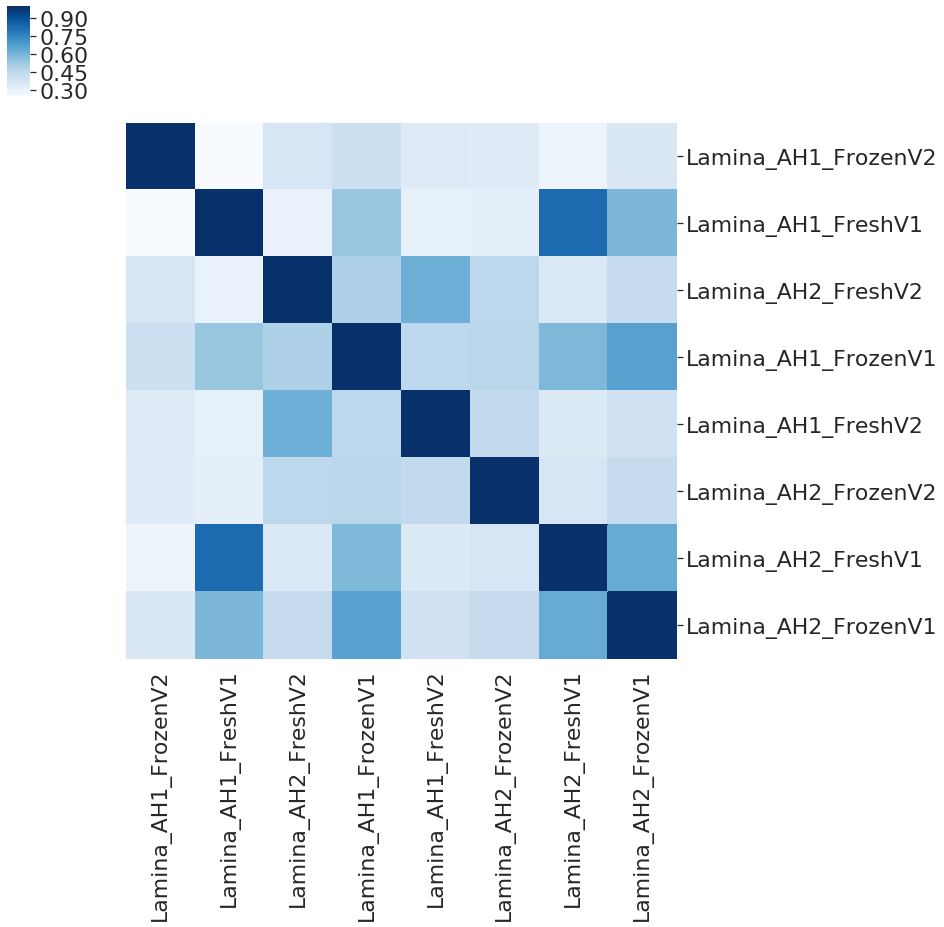

In [23]:
corr_data = depth_data[list(filter(lambda x: not x.endswith('0M') and 'Lamina' in x, list(depth_data.columns)))]
corr_data.columns = pd.Series(corr_data.columns).str.replace('NucleiAM', 'FreshV2').str.replace('Nuclei', 'FreshV1').str.replace('TissueAM', 'FrozenV2').str.replace('Tissue', 'FrozenV1').str.replace('CP', 'AH2').str.replace('GS', 'AH1')
sb.clustermap(data=corr_data.corr(), annot=False, cmap = "Blues", method = 'complete', row_cluster = False, col_cluster = False, metric = 'pearson', figsize=(12,12))

In [25]:
FRiP = pd.read_csv("../Results/figures/FRiP_macs2.tab", sep = '\t')
FRiP['Tissue'] = FRiP['file'].str.split('_', expand = True)[0]
FRiP['Rep'] = FRiP['file'].str.split('_', expand = True)[1]
FRiP['Assay'] = FRiP['file'].str.split('_', expand = True)[2].str.replace('\.dedup', '')
FRiP = FRiP.assign(Vendor = ['V2' if a.endswith('AM') else 'V1' for a in FRiP['Assay']])
FRiP['Assay'] = FRiP['Assay'].str.replace('TissueAM', 'Frozen').str.replace('Tissue', 'Frozen').str.replace('NucleiAM', 'Fresh').str.replace('Nuclei', 'Fresh')
FRiP['Rep'] = FRiP['Rep'].str.replace('CP', 'AH2').str.replace('GS', 'AH1')
FRiP

,file,featureType,percent,featureReadCount,totalReadCount,Tissue,Rep,Assay,Vendor
0,Lamina_CP_Tissue.dedup,Lamina_CP_Tissue_peaks,15.48,17561856,113428925,Lamina,AH2,Frozen,V1
1,Lamina_GS_Tissue.dedup,Lamina_GS_Tissue_peaks,21.95,26572276,121041643,Lamina,AH1,Frozen,V1
2,Liver_CP_Tissue.dedup,Liver_CP_Tissue_peaks,39.58,37879315,95693559,Liver,AH2,Frozen,V1
3,Liver_GS_Tissue.dedup,Liver_GS_Tissue_peaks,36.42,42476731,116638290,Liver,AH1,Frozen,V1
4,Lamina_CP_TissueAM.dedup,Lamina_CP_TissueAM_peaks,5.42,2976529,54946431,Lamina,AH2,Frozen,V2
5,Lamina_GS_TissueAM.dedup,Lamina_GS_TissueAM_peaks,3.01,1508801,50132970,Lamina,AH1,Frozen,V2
6,Liver_CP_TissueAM.dedup,Liver_CP_TissueAM_peaks,42.60,22613377,53080754,Liver,AH2,Frozen,V2
7,Liver_GS_TissueAM.dedup,Liver_GS_TissueAM_peaks,45.61,22278167,48841503,Liver,AH1,Frozen,V2
8,Lamina_CP_Nuclei.dedup,Lamina_CP_Nuclei_peaks,40.80,44513917,109111395,Lamina,AH2,Fresh,V1
9,Lamina_GS_Nuclei.dedup,Lamina_GS_Nuclei_peaks,47.45,60632475,127769475,Lamina,AH1,Fresh,V1


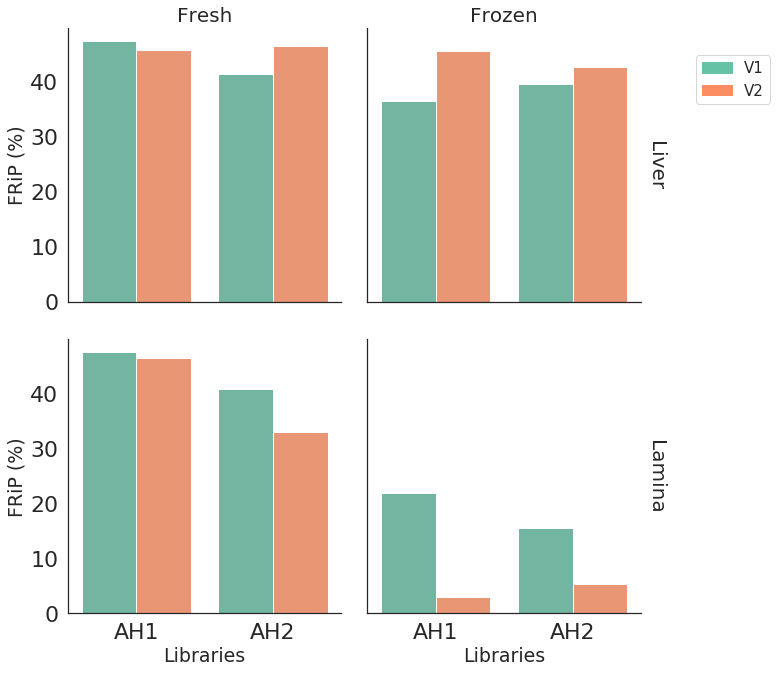

In [27]:
grid = sb.FacetGrid(FRiP, col = 'Assay', row = 'Tissue', margin_titles=True, legend_out = True, height = 5, row_order = ['Liver', 'Lamina'], col_order = ['Fresh', 'Frozen'])
colors = sb.color_palette('Set2')
hue_order = ['V1', 'V2']
hue_order_name = ['V1', 'V2']
grid = grid.map(sb.barplot, 'Rep','percent', 'Vendor', order = ['AH1', 'AH2'], hue_order = hue_order, palette = sb.color_palette('Set2', desat = 1))
#grid = grid.map(sb.barplot, 'Rep','Duplicates(QC passed)', 'Reads', order = temp.Rep.unique(), hue_order = hue_order, palette = sb.color_palette('Set2', desat = 1))
[plt.setp(ax.texts, text="") for ax in grid.axes.flat]
grid = grid.set_titles(row_template = '{row_name}', col_template = '{col_name}', size = 20)
grid = grid.set_ylabels('FRiP (%)', size = 19)
grid = grid.set_xlabels('Libraries', size = 19)
#grid.fig.suptitle('Reads')
name_to_color = {
    hue_order_name[0]: colors[0],
    hue_order_name[1]: colors[1]
}
patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in name_to_color.items()]
plt.legend(loc='center right',bbox_to_anchor=(1.5,1.95), handles=patches, fontsize=15)

In [28]:
LCPN = pbt.BedTool("../Results/macs2/Liver_CP_Nuclei_peaks.broadPeak")
LGSN = pbt.BedTool("../Results/macs2/Liver_GS_Nuclei_peaks.broadPeak")
LCPN1 = pbt.BedTool("../Results/macs2/Liver_CP_NucleiFirst_peaks.broadPeak")
LGSN1 = pbt.BedTool("../Results/macs2/Liver_CP_NucleiFirst_peaks.broadPeak")
liver_h3k4me1 = pbt.BedTool("/home/pengsc/projects/HistoneMarks/Peak_Calls/H3K4me1_Liver_Combined_Peaks.bed")
liver_h3k4me3 = pbt.BedTool("/home/pengsc/projects/HistoneMarks/Peak_Calls/H3K4me3_Liver_Combined_Peaks.bed")
liver_h3k27ac = pbt.BedTool("/home/pengsc/projects/HistoneMarks/Peak_Calls/H3K27ac_Liver_Combined_Peaks.bed")
liver_h3k27me3 = pbt.BedTool("/home/pengsc/projects/HistoneMarks/Peak_Calls/H3K27me3_Liver.Combined_1.bed")
lamina_h3k4me1 = pbt.BedTool("/home/pengsc/projects/HistoneMarks/Peak_Calls/H3K4me1_Lamina_Combined_Peaks.bed")
lamina_h3k4me3 = pbt.BedTool("/home/pengsc/projects/HistoneMarks/Peak_Calls/H3K4me3_Lamina_Combined_Peaks.bed")
lamina_h3k27ac = pbt.BedTool("/home/pengsc/projects/HistoneMarks/Peak_Calls/H3K27ac_Lamina_Combined_Peaks.bed")
lamina_h3k27me3 = pbt.BedTool("/home/pengsc/projects/HistoneMarks/Peak_Calls/H3K27me3_Lamina.Combined_1.bed")

In [30]:
atac_peaks = {}
atac_peaks['Liver_AH2_NucleiCombined'] = pbt.BedTool("../Results/macs2/Liver_CP_Nuclei_peaks.broadPeak")
atac_peaks['Liver_AH1_NucleiCombined'] = pbt.BedTool("../Results/macs2/Liver_GS_Nuclei_peaks.broadPeak")
atac_peaks['Liver_AH2_Nuclei1st'] = pbt.BedTool("../Results/macs2/Liver_CP_NucleiFirst_peaks.broadPeak")
atac_peaks['Liver_AH1_Nuclei1st'] = pbt.BedTool("../Results/macs2/Liver_GS_NucleiFirst_peaks.broadPeak")

In [31]:
h3k27ac = []
h3k4me1 = []
h3k4me3 = []
h3k27me3 = []
peaks = []
libs = atac_peaks.keys()
for lib in libs:
    h3k27ac.append((atac_peaks[lib] + liver_h3k27ac).count())
    h3k4me1.append((atac_peaks[lib] + liver_h3k4me1).count())
    h3k4me3.append((atac_peaks[lib] + liver_h3k4me3).count())
    h3k27me3.append((atac_peaks[lib] + liver_h3k27me3).count())
    peaks.append(atac_peaks[lib].count())
frip = [0.41,0.38,0.42,0.45]
atac_chip_overlap = pd.DataFrame({'Lib': list(libs), 'h3k27ac': h3k27ac, 'h3k4me1': h3k4me1, 'h3k4me3': h3k4me3, 'h3k27me3': h3k27me3, 'FRiP': frip, 'Peaks': peaks})
atac_chip_overlap['h3k27ac%'] = atac_chip_overlap['h3k27ac'] / liver_h3k27ac.count()
atac_chip_overlap['h3k4me1%'] = atac_chip_overlap['h3k4me1'] / liver_h3k4me1.count()
atac_chip_overlap['h3k4me3%'] = atac_chip_overlap['h3k4me3'] / liver_h3k4me3.count()
atac_chip_overlap['h3k27me3%'] = atac_chip_overlap['h3k27me3'] / liver_h3k27me3.count()

In [32]:
atac_chip_overlap

,Lib,h3k27ac,h3k4me1,h3k4me3,h3k27me3,FRiP,Peaks,h3k27ac%,h3k4me1%,h3k4me3%,h3k27me3%
0,Liver_AH2_NucleiCombined,43092,48430,22469,6615,0.41,116466,0.491980,0.414782,0.788441,0.578740
1,Liver_AH1_NucleiCombined,45371,61280,22081,10659,0.38,186585,0.517999,0.524837,0.774826,0.932546
2,Liver_AH2_Nuclei1st,41961,45585,22286,5661,0.42,98890,0.479067,0.390416,0.782020,0.495276
3,Liver_AH1_Nuclei1st,45905,58024,22542,8186,0.45,139100,0.524095,0.496951,0.791003,0.716185


In [92]:
def rename(Series):
    if not "0M" in Series.File and not '5M' in Series.File:
        tmp = Series.File.split('_')
        if len(tmp) == 3:
            tmp.append('OG')
        else:
            tmp.append(tmp[-1])
            tmp[-2] = 'OG'
        Series.File = '_'.join(tmp)
    return Series

data = pd.read_csv("../Results/metrics/mapping_stats_Liver.csv", comment = "#", header = 0, index_col=False)
data = data.query("File.str.contains('Liver') & not (File.str.contains('AM')) & not (File.str.contains('First'))")
data = data.apply(rename, axis = 1)
temp = data['File'].str.split("_", expand = True)
temp[4].replace([None], 'All', inplace = True)
#temp[2].replace('NucleiFirst', 'Nuclei', inplace = True)
temp.columns = ['Tissue', 'Rep', 'Assay', 'Reads', 'sub']
temp = temp.merge(data, how = 'left', left_index = True, right_index = True)
sub_data = temp[["Tissue", "Rep", "Assay", "Reads", 'sub', "Total(QC passed)", "Mapped(QC passed)", "Mapped%(QC passed)", "Duplicates(QC passed)"]]#.set_index(["Tissue", "Rep", "Assay", "Reads"])
sub_data['Unique'] = sub_data['Mapped(QC passed)'] - sub_data['Duplicates(QC passed)']
sub_data = sub_data.sort_values(['Tissue', 'Rep', 'Assay', 'Reads'])

In [97]:
sub_data

,Tissue,Rep,Assay,Reads,sub,Total(QC passed),Mapped(QC passed),Mapped%(QC passed),Duplicates(QC passed),Unique
125,Liver,CP,Nuclei,100M,chrM,22841154,22817165,99.89%,22566101,251064
207,Liver,CP,Nuclei,100M,All,98142613,97446213,99.29%,90684439,6761774
242,Liver,CP,Nuclei,100M,dedup,4109612,4109612,100.00%,0,4109612
781,Liver,CP,Nuclei,100M,filtered,66917939,66917939,100.00%,62808327,4109612
166,Liver,CP,Nuclei,105M,dedup,4364417,4364417,100.00%,0,4364417
...,...,...,...,...,...,...,...,...,...,...
796,Liver,GS,Tissue,95M,chrM,4310727,4303964,99.84%,3382202,921762
474,Liver,GS,Tissue,OG,All,170233737,168979864,99.26%,34852938,134126926
592,Liver,GS,Tissue,OG,chrM,7693582,7681434,99.84%,6034709,1646725
628,Liver,GS,Tissue,OG,dedup,116638290,116638290,100.00%,0,116638290


In [33]:
peaks_macs2 = {}
tissues = ['Lamina', 'Liver']
reps = ['CP', 'GS']
Libs = ['Nuclei', 'Tissue', 'NucleiAM', 'TissueAM']
for i in itertools.product(*[tissues, reps, Libs]):
    name = '_'.join(list(i))
    tissue, rep, lib = i
    peaks_macs2[name] = pbt.BedTool("../Results/macs2/{}_50M_peaks.broadPeak".format(name))

peaks_macs2_df = {}
for i in peaks_macs2.keys():
    #peaks_df[i] = peaks[i].to_dataframe(names = ['chrom', 'start', 'end', 'name', 'na1', 'na2', 'open_start', 'open_stop', 'display_color', 'num_subRegions', 'sub_regionLength', 'sub_start', 'peak_score', 'na3'], index_col = False)
    peaks_macs2_df[i] = peaks_macs2[i].to_dataframe(names = ['chrom', 'start', 'end', 'name', 'score', 'strand', 'foldChange', '-log10p', '-log10q'], index_col = False)
    
summary_df_macs2 = pd.DataFrame(columns=['cutoff', 'feature', 'tissue', 'rep', 'lib', 'value'])
for i in peaks_macs2_df.keys():
    print(i)
    tissue, rep, lib = i.split('_')
    for cutoff in range(1,int(max(peaks_macs2_df[i]['-log10p'])), 100):
        summary_df_macs2 = summary_df_macs2.append(pd.DataFrame(data = {'cutoff': [cutoff], 'feature': ['peak_number'], 'tissue': [tissue], 'rep': [rep], 'lib': [lib], 'value': [len(peaks_macs2_df[i][peaks_macs2_df[i]['-log10p'] > cutoff])]}))
        temp = peaks_macs2_df[i][peaks_macs2_df[i]['-log10p'] > cutoff]['end'] - peaks_macs2_df[i][peaks_macs2_df[i]['-log10p'] > cutoff]['start']
        summary_df_macs2 = summary_df_macs2.append(pd.DataFrame(data = {'cutoff': [cutoff], 'feature': ['peak_len_avg'], 'tissue': [tissue], 'rep': [rep], 'lib': [lib], 'value': [temp.mean()]}))
        summary_df_macs2 = summary_df_macs2.append(pd.DataFrame(data = {'cutoff': [cutoff], 'feature': ['peak__len_total'], 'tissue': [tissue], 'rep': [rep], 'lib': [lib], 'value': [temp.sum()]}))

summary_df_macs2['cutoff'] = summary_df_macs2['cutoff'].astype(int)
summary_df_macs2['value'] = summary_df_macs2['value'].astype(float)

def total_coverage(df):
    temp = pbt.bedtool.BedTool.from_dataframe(df)
    return temp.sort().merge().total_coverage()

Lamina_CP_Nuclei
Lamina_CP_Tissue
Lamina_CP_NucleiAM
Lamina_CP_TissueAM
Lamina_GS_Nuclei
Lamina_GS_Tissue
Lamina_GS_NucleiAM
Lamina_GS_TissueAM
Liver_CP_Nuclei
Liver_CP_Tissue
Liver_CP_NucleiAM
Liver_CP_TissueAM
Liver_GS_Nuclei
Liver_GS_Tissue
Liver_GS_NucleiAM
Liver_GS_TissueAM


In [34]:
liver_h3k4me1 = pbt.BedTool("/home/pengsc/projects/HistoneMarks/Peak_Calls/H3K4me1_Liver_Combined_Peaks.bed")
liver_h3k4me3 = pbt.BedTool("/home/pengsc/projects/HistoneMarks/Peak_Calls/H3K4me3_Liver_Combined_Peaks.bed")
liver_h3k27ac = pbt.BedTool("/home/pengsc/projects/HistoneMarks/Peak_Calls/H3K27ac_Liver_Combined_Peaks.bed")
liver_h3k27me3 = pbt.BedTool("/home/pengsc/projects/HistoneMarks/Peak_Calls/H3K27me3_Liver.Combined_1.bed")
lamina_h3k4me1 = pbt.BedTool("/home/pengsc/projects/HistoneMarks/Peak_Calls/H3K4me1_Lamina_Combined_Peaks.bed")
lamina_h3k4me3 = pbt.BedTool("/home/pengsc/projects/HistoneMarks/Peak_Calls/H3K4me3_Lamina_Combined_Peaks.bed")
lamina_h3k27ac = pbt.BedTool("/home/pengsc/projects/HistoneMarks/Peak_Calls/H3K27ac_Lamina_Combined_Peaks.bed")
lamina_h3k27me3 = pbt.BedTool("/home/pengsc/projects/HistoneMarks/Peak_Calls/H3K27me3_Lamina.Combined_1.bed")
liver_active = (liver_h3k4me1.intersect(liver_h3k4me3) + liver_h3k27ac - liver_h3k27me3).sort().merge()
liver_inactive = liver_h3k27me3.sort().merge()
lamina_active = (lamina_h3k4me1.intersect(lamina_h3k4me3) + lamina_h3k27ac - lamina_h3k27me3).sort().merge()
lamina_inactive = lamina_h3k27me3.sort().merge()

In [53]:
ratio_df = pd.DataFrame(columns=['cutoff', 'tissue', 'lib', 'rep', 'ratio', 'value'])
for i in peaks_macs2_df.keys():
    tissue, rep, lib = i.split('_')
    print(i)
    max_score = int(max(peaks_macs2_df[i]['score']))
    for cutoff in range(1,200,2):
        filtered = peaks_macs2_df[i][peaks_macs2_df[i]['score'] > cutoff]
        (active, inactive) = (liver_active, liver_inactive) if tissue == "Liver" else (lamina_active, lamina_inactive)
        active_overlap = pbt.bedtool.BedTool.from_dataframe(filtered).intersect(active).sort().merge().total_coverage()
        inactive_overlap = pbt.bedtool.BedTool.from_dataframe(filtered).intersect(inactive).sort().merge().total_coverage()
        ratio_df = ratio_df.append(pd.DataFrame(data = {'cutoff': [cutoff], 'tissue': [tissue], 'lib': [lib], 'rep': [rep], 'ratio': 'active', 'value': [active_overlap]}))
        ratio_df = ratio_df.append(pd.DataFrame(data = {'cutoff': [cutoff], 'tissue': [tissue], 'lib': [lib], 'rep': [rep], 'ratio': 'inactive', 'value': [inactive_overlap]}))
ratio_df['cutoff'] = ratio_df['cutoff'].astype(int)
ratio_df['value'] = ratio_df['value'].astype(int)
RP = liver_active.total_coverage()
RN = liver_inactive.total_coverage()
ratio_df_pivot = ratio_df.pivot_table(index = ['cutoff', 'tissue', 'rep', 'lib'], columns = 'ratio', values = 'value')
ratio_df_pivot.columns = ['TP', 'FP']
ratio_df_pivot['precision'] = ratio_df_pivot['TP']/(ratio_df_pivot['TP'] + ratio_df_pivot['FP'])
ratio_df_pivot['recall'] = np.where(ratio_df_pivot.reset_index()['tissue'] == 'Liver', ratio_df_pivot['TP'] / liver_active.total_coverage(), ratio_df_pivot['TP'] / lamina_active.total_coverage())
ratio_df_pivot['FPR'] = np.where(ratio_df_pivot.reset_index()['tissue'] == 'Liver', ratio_df_pivot['FP'] / liver_inactive.total_coverage(), ratio_df_pivot['FP'] / lamina_inactive.total_coverage())
metrics_df = ratio_df_pivot.reset_index().drop(['TP', 'FP'], axis = 1).melt(id_vars = ['cutoff', 'tissue', 'rep', 'lib'], value_vars = ['precision', 'recall', 'FPR'])

Lamina_CP_Nuclei
Lamina_CP_Tissue
Lamina_CP_NucleiAM
Lamina_CP_TissueAM
Lamina_GS_Nuclei
Lamina_GS_Tissue
Lamina_GS_NucleiAM
Lamina_GS_TissueAM
Liver_CP_Nuclei
Liver_CP_Tissue
Liver_CP_NucleiAM
Liver_CP_TissueAM
Liver_GS_Nuclei
Liver_GS_Tissue
Liver_GS_NucleiAM
Liver_GS_TissueAM


In [57]:
metrics_df = metrics_df.assign(Vendor = ['V2' if a.endswith('AM') else 'V1' for a in metrics_df['lib']])
metrics_df['lib'] = metrics_df['lib'].str.replace('TissueAM', 'Frozen').str.replace('Tissue', 'Frozen').str.replace('NucleiAM', 'Fresh').str.replace('Nuclei', 'Fresh')
metrics_df['rep'] = metrics_df['rep'].str.replace('CP', 'AH2').str.replace('GS', 'AH1')
metrics_df.to_csv("macs2_peak_metrics.csv")

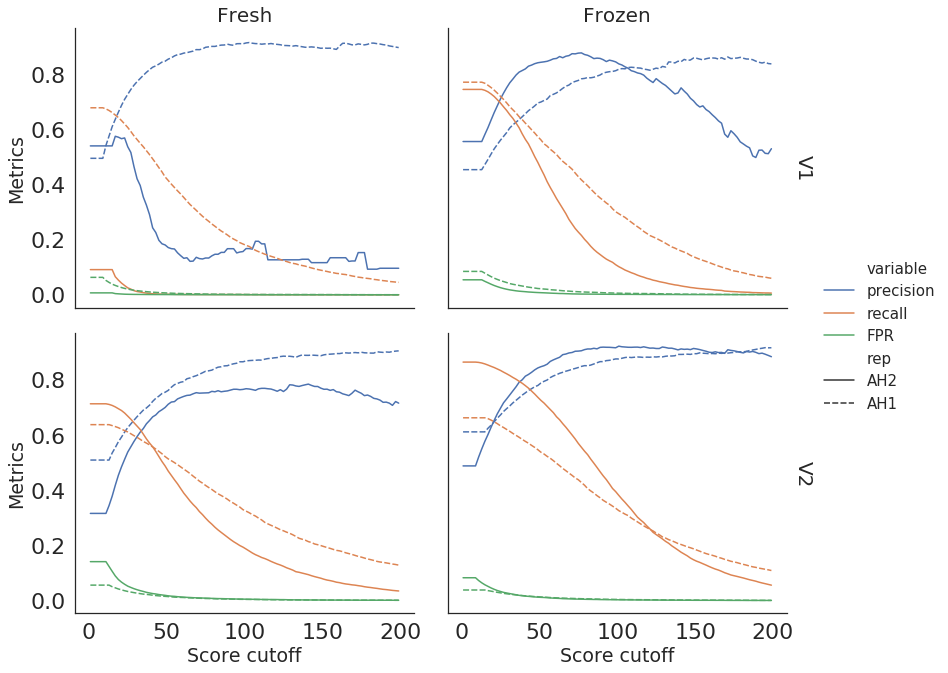

In [58]:
metrics_df = pd.read_csv("macs2_peak_metrics.csv", index_col=0)
g = sb.FacetGrid(metrics_df[metrics_df['tissue'] == 'Liver'], row="Vendor", col="lib", margin_titles=True, sharey = True, height = 5, aspect = 1.2, sharex = True, legend_out = True)
g = g.map_dataframe(sb.lineplot, 'cutoff', 'value', style = 'rep', hue = 'variable')
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
#g = g.set(xlim = (0,100))
g = g.set_titles(row_template = '{row_name}', col_template = '{col_name}', size = 20)
g = g.set_ylabels('Metrics', size = 19)
g = g.set_xlabels('Score cutoff', size = 19)
g.add_legend(fontsize=15)

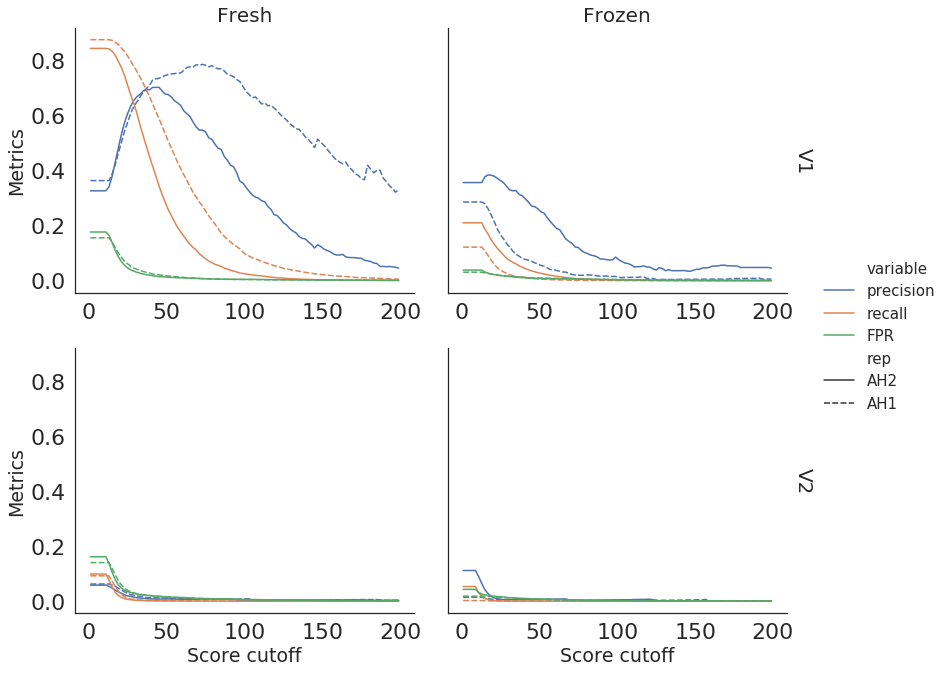

In [59]:
g = sb.FacetGrid(metrics_df[metrics_df['tissue'] == 'Lamina'], row="Vendor", col="lib", margin_titles=True, sharey = True, height = 5, aspect = 1.2, sharex = False, legend_out = True)
g = g.map_dataframe(sb.lineplot, 'cutoff', 'value', style = 'rep', hue = 'variable')
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
#g = g.set(xlim = (0,100))
g = g.set_titles(row_template = '{row_name}', col_template = '{col_name}', size = 20)
g = g.set_ylabels('Metrics', size = 19)
g = g.set_xlabels('Score cutoff', size = 19)
g.add_legend(fontsize=15)

In [60]:
peaks = {}
tissues = ['Lamina', 'Liver']
reps = ['CP', 'GS']
Libs = ['Nuclei', 'Tissue', 'NucleiAM', 'TissueAM']
for i in itertools.product(*[tissues, reps, Libs]):
    name = '_'.join(list(i)) 
    tissue, rep, lib = i
    peaks[name] = pbt.BedTool("../Results/hmmratac/{}_60M_peaks.gappedPeak".format(name))

peaks_df = {}
for i in peaks.keys():
    peaks_df[i] = peaks[i].to_dataframe(names = ['chrom', 'start', 'end', 'name', 'na1', 'na2', 'open_start', 'open_stop', 'display_color', 'num_subRegions', 'sub_regionLength', 'sub_start', 'peak_score', 'na3'], index_col = False)
    #peaks_df[i] = peaks[i].to_dataframe(names = ['chrom', 'start', 'end', 'name', 'score', 'strand', 'foldChange', '-log10p', '-log10q'], index_col = False)
    
summary_df = pd.DataFrame(columns=['cutoff', 'feature', 'tissue', 'rep', 'lib', 'value'])
for i in peaks_df.keys():
    tissue, rep, lib = i.split('_')
    for cutoff in range(1,int(max(peaks_df[i]['peak_score'])), 10):
        summary_df = summary_df.append(pd.DataFrame(data = {'cutoff': [cutoff], 'feature': ['peak_number'], 'tissue': [tissue], 'rep': [rep], 'lib': [lib], 'value': [len(peaks_df[i][peaks_df[i]['peak_score'] > cutoff])]}))
        temp = peaks_df[i][peaks_df[i]['peak_score'] > cutoff]['end'] - peaks_df[i][peaks_df[i]['peak_score'] > cutoff]['start']
        summary_df = summary_df.append(pd.DataFrame(data = {'cutoff': [cutoff], 'feature': ['peak_len_avg'], 'tissue': [tissue], 'rep': [rep], 'lib': [lib], 'value': [temp.mean()]}))
        summary_df = summary_df.append(pd.DataFrame(data = {'cutoff': [cutoff], 'feature': ['peak__len_total'], 'tissue': [tissue], 'rep': [rep], 'lib': [lib], 'value': [temp.sum()]}))

summary_df['cutoff'] = summary_df['cutoff'].astype(int)
summary_df['value'] = summary_df['value'].astype(float)

ratio_df_hmmratac = pd.DataFrame(columns=['cutoff', 'tissue', 'lib', 'rep', 'ratio', 'value'])
for i in peaks_df.keys():
    tissue, rep, lib = i.split('_')
    print(i)
    max_score = int(max(peaks_df[i]['peak_score']))
    for cutoff in range(1,200,2):
        filtered = peaks_df[i][peaks_df[i]['peak_score'] > cutoff]
        (active, inactive) = (liver_active, liver_inactive) if tissue == "Liver" else (lamina_active, lamina_inactive)
        active_overlap = pbt.bedtool.BedTool.from_dataframe(filtered).intersect(active).sort().merge().total_coverage()
        inactive_overlap = pbt.bedtool.BedTool.from_dataframe(filtered).intersect(inactive).sort().merge().total_coverage()
        ratio_df_hmmratac = ratio_df_hmmratac.append(pd.DataFrame(data = {'cutoff': [cutoff], 'tissue': [tissue], 'lib': [lib], 'rep': [rep], 'ratio': 'active', 'value': [active_overlap]}))
        ratio_df_hmmratac = ratio_df_hmmratac.append(pd.DataFrame(data = {'cutoff': [cutoff], 'tissue': [tissue], 'lib': [lib], 'rep': [rep], 'ratio': 'inactive', 'value': [inactive_overlap]}))
ratio_df_hmmratac['cutoff'] = ratio_df_hmmratac['cutoff'].astype(int)
ratio_df_hmmratac['value'] = ratio_df_hmmratac['value'].astype(int)
RP = liver_active.total_coverage()
RN = liver_inactive.total_coverage()
ratio_df_hmmratac_pivot = ratio_df_hmmratac.pivot_table(index = ['cutoff', 'tissue', 'rep', 'lib'], columns = 'ratio', values = 'value')
ratio_df_hmmratac_pivot.columns = ['TP', 'FP']
ratio_df_hmmratac_pivot['precision'] = ratio_df_hmmratac_pivot['TP']/(ratio_df_hmmratac_pivot['TP'] + ratio_df_hmmratac_pivot['FP'])
ratio_df_hmmratac_pivot['recall'] = ratio_df_hmmratac_pivot['TP']/RP
ratio_df_hmmratac_pivot['FPR'] = ratio_df_hmmratac_pivot['FP']/RN
metrics_df_hmmratac = ratio_df_hmmratac_pivot.reset_index().drop(['TP', 'FP'], axis = 1).melt(id_vars = ['cutoff', 'tissue', 'rep', 'lib'], value_vars = ['precision', 'recall', 'FPR'])
metrics_df_hmmratac.to_csv("hmmratac_peak_metrics.csv")

KeyboardInterrupt: 

In [119]:
metrics_df_hmmratac = pd.read_csv("hmmratac_peak_metrics.csv", index_col=0)

In [120]:
metrics_df_hmmratac = metrics_df_hmmratac.assign(Vendor = ['V2' if a.endswith('AM') else 'V1' for a in metrics_df_hmmratac['lib']])
metrics_df_hmmratac['lib'] = metrics_df_hmmratac['lib'].str.replace('TissueAM', 'Frozen').str.replace('Tissue', 'Frozen').str.replace('NucleiAM', 'Fresh').str.replace('Nuclei', 'Fresh')
metrics_df_hmmratac['rep'] = metrics_df_hmmratac['rep'].str.replace('CP', 'AH2').str.replace('GS', 'AH1')

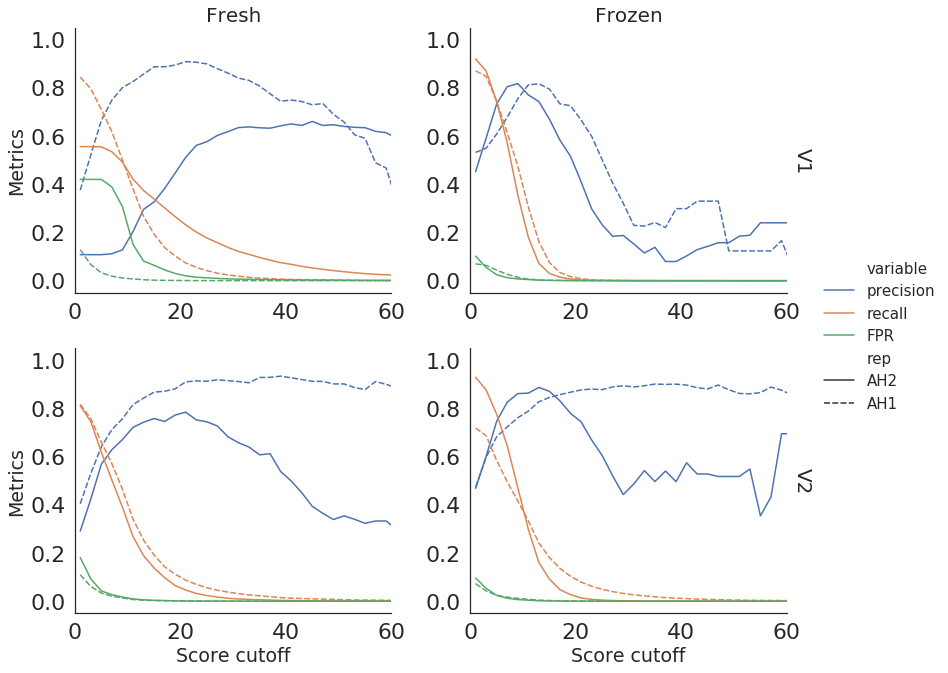

In [121]:
#sb.set_style("white")
g = sb.FacetGrid(metrics_df_hmmratac[metrics_df_hmmratac['tissue'] == 'Liver'], row="Vendor", col="lib", margin_titles=True, sharey = False, height = 5, aspect = 1.2, sharex = False, legend_out = True)
g = g.map_dataframe(sb.lineplot, 'cutoff', 'value', style = 'rep', hue = 'variable', color = sb.color_palette("Set2"))
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g = g.set(xlim = (0,60))
g = g.set_titles(row_template = '{row_name}', col_template = '{col_name}', size = 20)
g = g.set_ylabels('Metrics', size = 19)
g = g.set_xlabels('Score cutoff', size = 19)
g.add_legend(fontsize=15)

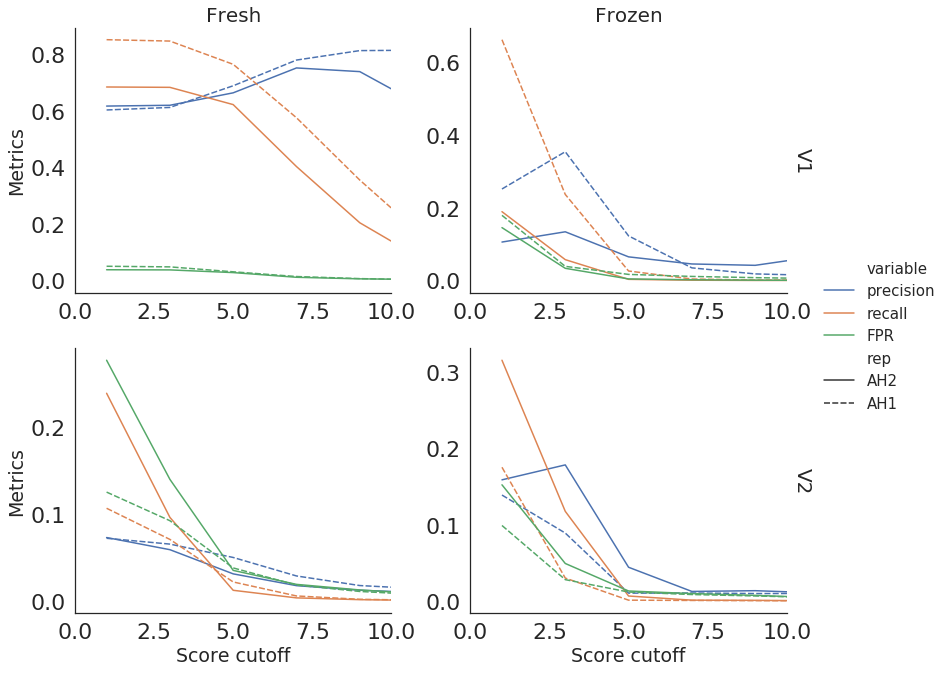

In [122]:
g = sb.FacetGrid(metrics_df_hmmratac[metrics_df_hmmratac['tissue'] == 'Lamina'], row="Vendor", col="lib", margin_titles=True, sharey = False, height = 5, aspect = 1.2, sharex = False, legend_out = True)
g = g.map_dataframe(sb.lineplot, 'cutoff', 'value', style = 'rep', hue = 'variable')
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g = g.set_titles(row_template = '{row_name}', col_template = '{col_name}', size = 20)
g = g.set(xlim = (0,10))
g = g.set_ylabels('Metrics', size = 19)
g = g.set_xlabels('Score cutoff', size = 19)
g.add_legend(fontsize=15)

In [65]:
def get_intersection(df):
    for i in df.cutoff.unique():
        precision = df.query("cutoff=={} and variable=='precision'".format(i)).value.iloc[0]
        recall = df.query("cutoff=={} and variable=='recall'".format(i)).value.iloc[0]
        if recall == precision:
            return i
        elif recall < precision:
            return i-1


In [66]:
cutoff_scores={}
tissues = ['Lamina', 'Liver']
reps = ['CP', 'GS']
Libs = ['Fresh', 'Frozen']
for i in itertools.product(*[tissues, reps, Libs]):
    name = '_'.join(list(i))
    tissue, rep, lib = i
    cutoff_scores[name] = get_intersection(metrics_df_hmmratac.query("tissue=='{0}' and rep=='{1}' and lib=='{2}' and Vendor=='V1'".format(tissue, rep, lib)))


In [67]:
cutoff_scores

{'Lamina_CP_Fresh': 4,
 'Lamina_CP_Frozen': 2,
 'Lamina_GS_Fresh': 6,
 'Lamina_GS_Frozen': 2,
 'Liver_CP_Fresh': 16,
 'Liver_CP_Frozen': 6,
 'Liver_GS_Fresh': 6,
 'Liver_GS_Frozen': 6}

In [68]:
peaks_df_filtered = {}
peaks = {}
tissues = ['Lamina', 'Liver']
reps = ['CP', 'GS']
Libs = ['Nuclei', 'Tissue', 'NucleiAM', 'TissueAM']
for i in itertools.product(*[tissues, reps, Libs]):
    name = '_'.join(list(i))
    tissue, rep, lib = i
    peaks[name] = pbt.BedTool("../Results/hmmratac/{}_peaks.gappedPeak".format(name))

peaks_df = {}
for i in peaks.keys():
    peaks_df[i] = peaks[i].to_dataframe(names = ['chrom', 'start', 'end', 'name', 'na1', 'na2', 'open_start', 'open_stop', 'display_color', 'num_subRegions', 'sub_regionLength', 'sub_start', 'peak_score', 'na3'], index_col = False)
    #peaks_df[i] = peaks[i].to_dataframe(names = ['chrom', 'start', 'end', 'name', 'score', 'strand', 'foldChange', '-log10p', '-log10q'], index_col = False)
tissues = ['Lamina', 'Liver']
reps = ['CP', 'GS']
Libs = ['Nuclei', 'Tissue']
libs = {'Nuclei': 'Fresh', 'Tissue': 'Frozen'}
for i in itertools.product(*[tissues, reps, Libs]):
    tissue, rep, Lib = i
    lib = libs[Lib]
    name = '_'.join([tissue, rep, lib])
    name2 = '_'.join([tissue, rep, Lib])
    peaks_df_filtered[name] = peaks_df[name2][peaks_df[name2]['peak_score']>=cutoff_scores[name]]

In [72]:
peaks_df_filtered['Lamina_CP_Fresh']

,chrom,start,end,name,na1,na2,open_start,open_stop,display_color,num_subRegions,sub_regionLength,sub_start,peak_score,na3
2,chr21,602690,603860,Peak_6,.,.,602880,603160,"255,0,0",3,"1,280,1","0,190,1169",5.116731,-1
3,chr21,606420,615370,Peak_7,.,.,609880,612800,"255,0,0",3,"1,2920,1","0,3460,8949",5.477521,-1
4,chr21,612800,617710,Peak_8,.,.,615370,616310,"255,0,0",3,"1,940,1","0,2570,4909",4.546664,-1
5,chr21,616310,619300,Peak_9,.,.,617710,618930,"255,0,0",3,"1,1220,1","0,1400,2989",9.445112,-1
6,chr21,618930,620410,Peak_10,.,.,619300,619780,"255,0,0",3,"1,480,1","0,370,1479",6.838781,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34298,chrX,127254190,127255460,Peak_41758,.,.,127254560,127255210,"255,0,0",3,"1,650,1","0,370,1269",9.768531,-1
34299,chrX,127514450,127516290,Peak_41759,.,.,127514860,127515750,"255,0,0",3,"1,890,1","0,410,1839",7.308641,-1
34300,chrX,127546350,127548380,Peak_41760,.,.,127547280,127547970,"255,0,0",3,"1,690,1","0,930,2029",7.426790,-1
34301,chrX,127706730,127708670,Peak_41761,.,.,127707420,127708070,"255,0,0",3,"1,650,1","0,690,1939",8.084364,-1


In [69]:
for i in peaks_df_filtered.keys():
    peaks_df_filtered[i].to_csv(i.replace('GS', 'AH1').replace('CP', 'AH2')+'_filtered_peaks.csv')

In [73]:
for i in peaks_df_filtered.keys():
    peaks_df_filtered[i].to_csv(i.replace('GS', 'AH1').replace('CP', 'AH2')+'_filtered_peaks.bed', sep = '\t', header=False)

In [34]:
for i in peaks_df.keys():
    print("{0}: {1}".format(i, len(peaks_df[i])))
    df = peaks_df[i]
    df['len'] = df['end'] - df['start']
    print("Covered bases: "+str(df['len'].sum()))
    print(df.len.describe())

Lamina_CP_Nuclei: 34490
Covered bases: 97334627
count     34490.00000
mean       2822.11154
std        3180.96666
min           1.00000
25%        1690.00000
50%        2410.00000
75%        3430.00000
max      408220.00000
Name: len, dtype: float64
Lamina_CP_Tissue: 33843
Covered bases: 113515393
count    33843.000000
mean      3354.176432
std       1855.552234
min          1.000000
25%       2060.000000
50%       3010.000000
75%       4240.000000
max      39300.000000
Name: len, dtype: float64
Lamina_CP_NucleiAM: 514725
Covered bases: 322229232
count    514725.000000
mean        626.022113
std         933.484832
min           1.000000
25%         430.000000
50%         560.000000
75%         740.000000
max      328350.000000
Name: len, dtype: float64
Lamina_CP_TissueAM: 16386
Covered bases: 9510976
count    16386.000000
mean       580.433053
std        563.193662
min          1.000000
25%        400.000000
50%        500.000000
75%        650.000000
max      23010.000000
Name: len, d

In [21]:
for i in peaks_df_filtered.keys():
    print("{0}: {1}".format(i, len(peaks_df_filtered[i])))
    df = peaks_df_filtered[i]
    df['len'] = df['end'] - df['start']
    print("Covered bases: "+str(df['len'].sum()))
    print(df.len.describe())

Lamina_CP_Fresh: 30906
Covered bases: 89117724
count    30906.000000
mean      2883.508833
std       2240.508174
min        310.000000
25%       1760.000000
50%       2480.000000
75%       3510.000000
max      99950.000000
Name: len, dtype: float64
Lamina_CP_Frozen: 33762
Covered bases: 113504835
count    33762.000000
mean      3361.910876
std       1850.996672
min        350.000000
25%       2070.000000
50%       3010.000000
75%       4250.000000
max      39300.000000
Name: len, dtype: float64
Lamina_GS_Fresh: 28418
Covered bases: 88284203
count     28418.000000
mean       3106.629707
std        3249.364181
min         300.000000
25%        1870.000000
50%        2650.000000
75%        3730.000000
max      224900.000000
Name: len, dtype: float64
Lamina_GS_Frozen: 19886
Covered bases: 100651092
count    19886.000000
mean      5061.404606
std       3289.124876
min        290.000000
25%       2750.000000
50%       4300.000000
75%       6470.000000
max      48450.000000
Name: len, dtype: 

In [74]:
df = pd.DataFrame()
for i in peaks_df_filtered:
    df = df.append(peaks_df_filtered[i])
aggregated = pbt.BedTool.from_dataframe(df.drop_duplicates()).sort().merge()
all_libs = aggregated.to_dataframe().set_index(['chrom', 'start', 'end'])
for i in peaks_df_filtered:
    temp = (aggregated + pbt.BedTool.from_dataframe(peaks_df_filtered[i])).to_dataframe()
    temp = aggregated.to_dataframe().merge(temp, on=['chrom', 'start', 'end'], how='left', indicator=i)
    temp[i]=np.where(temp[i] == 'both', True, False)
    temp = temp.set_index(['chrom', 'start', 'end'])
    all_libs = all_libs.merge(temp, how='left', left_index = True, right_index = True)
all_libs.columns = pd.Series(all_libs.columns).str.replace('CP', 'AH2').str.replace('GS', 'AH1')
all_libs

Lamina_AH2_Fresh  Lamina_AH2_Frozen  \
chrom start     end                                              
chr1  60        1980                  False              False   
      45070     48980                  True               True   
      76850     80750                  True              False   
      93080     99550                  True               True   
      109580    115620                False              False   
...                                     ...                ...   
chrX  127979430 127984630             False              False   
      128055090 128057440             False              False   
      128074290 128079510             False              False   
      128156280 128159050              True               True   
      128200880 128203610             False              False   

                           Lamina_AH1_Fresh  Lamina_AH1_Frozen  \
chrom start     end                                              
chr1  60        1980                  False              False   
      45070     48980                  True              False   
      76850     80750                  True              False   
      93080     99550                  True               True   
      109580    115620                False              False   
...                                     ...                ...   
chrX  127979430 127984630             False              False   
      128055090 128057440             False              False   
      128074290 128079510             False              False   
      128156280 128159050              True              False   
      128200880 128203610             False              False   

                           Liver_AH2_Fresh  Liver_AH2_Frozen  Liver_AH1_Fresh  \
chrom start     end                                                             
chr1  60        1980                 False             False             True   
      45070     48980                False              True             True   
      76850     80750                False              True             True   
      93080     99550                False              True             True   
      109580    115620                True              True             True   
...                                    ...               ...              ...   
chrX  127979430 127984630            False             False             True   
      128055090 128057440            False             False             True   
      128074290 128079510            False             False             True   
      128156280 128159050            False              True             True   
      128200880 128203610            False             False             True   

                           Liver_AH1_Frozen  
chrom start     end                          
chr1  60        1980                  False  
      45070     48980                  True  
      76850     80750                  True  
      93080     99550                  True  
      109580    115620                False  
...                                     ...  
chrX  127979430 127984630             False  
      128055090 128057440             False  
      128074290 128079510             False  
      128156280 128159050              True  
      128200880 128203610             False  

[65118 rows x 8 columns]

In [101]:
f = plt.figure(figsize=(15,10))
f.text(0, 0, '\n'.join(plot.totals.index.values))

Text(0, 0, 'Liver_AH1_Fresh\nLiver_AH2_Frozen\nLamina_AH2_Frozen\nLamina_AH1_Fresh\nLamina_AH2_Fresh\nLiver_AH1_Frozen\nLamina_AH1_Frozen\nLiver_AH2_Fresh')

<Figure size 1080x720 with 0 Axes>

NameError: name 'index' is not defined

8 17 2


{'matrix': <matplotlib.axes._subplots.AxesSubplot at 0x14b33a365a90>,
 'shading': <matplotlib.axes._subplots.AxesSubplot at 0x14b33a117750>,
 'totals': <matplotlib.axes._subplots.AxesSubplot at 0x14b339555350>,
 'intersections': <matplotlib.axes._subplots.AxesSubplot at 0x14b33a75ef10>}

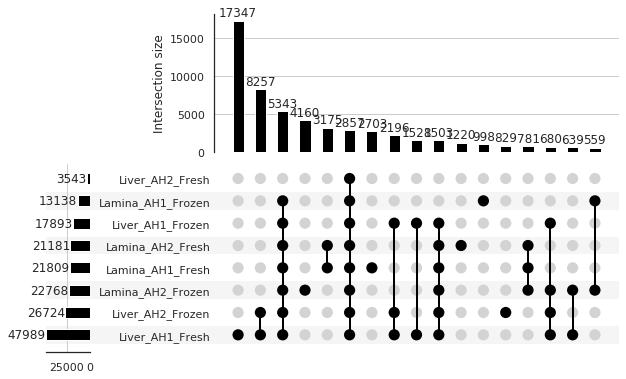

In [94]:
sb.set(font_scale=1)
sb.set_style("white")
import upsetplot as upset
all_libs_grouped = all_libs.reset_index().set_index([i.replace('CP', 'AH2').replace('GS', 'AH1') for i in peaks_df_filtered])
#all_tissues_grouped.index = all_tissues_grouped.index.droplevel(level=['lungd', 'adiposed'])
all_libs_grouped = all_libs_grouped.assign(feature=all_libs_grouped.chrom + ':' + all_libs_grouped.start.astype(str) + '-' + all_libs_grouped.end.astype(str)).drop(['chrom','start','end'], axis=1).groupby(level=[i.replace('CP', 'AH2').replace('GS', 'AH1') for i in peaks_df_filtered]).count()
plot = upset.UpSet(all_libs_grouped.feature, sort_by = 'cardinality', min_subset_size=500, show_counts=True)
plot.plot()

In [24]:
liver_either = all_libs.query("(Liver_CP_Fresh and not Liver_GS_Fresh) or (not Liver_CP_Fresh and Liver_GS_Fresh) and not Lamina_CP_Fresh and not Lamina_GS_Fresh").reset_index()
liver_both = all_libs.query("Liver_CP_Fresh and Liver_GS_Fresh and not Lamina_CP_Fresh and not Lamina_GS_Fresh ").reset_index()
lamina_either = all_libs.query("(Lamina_CP_Fresh and not Lamina_GS_Fresh) or (not Lamina_CP_Fresh and Lamina_GS_Fresh) and not Liver_CP_Fresh and not Liver_GS_Fresh").reset_index()
lamina_both = all_libs.query("Lamina_CP_Fresh and Lamina_GS_Fresh and not Liver_CP_Fresh and not Liver_GS_Fresh").reset_index()
liver_either = liver_either[["chrom", "start", "end"]]
liver_both = liver_both[["chrom", "start", "end"]]
lamina_either = lamina_either[["chrom", "start", "end"]]
lamina_both = lamina_both[["chrom", "start", "end"]]

In [162]:
def get_gene_cov(peak):
    bw_files = glob.glob("../../FAANG_mRNA/Results/bigwigs/*bigwig")
    #df = pd.DataFrame(index=["{0}:{1}-{2}".format(peak.chrom, peak.start, peak.end)])
    for bigwig_file in bw_files:
        rep = re.match('.+bigwigs/([0-9]+)_.+', bigwig_file).group(1)
        tissue = re.match('.+bigwigs/[0-9]+_([a-zA-Z]+).bigwig', bigwig_file).group(1)
        bigwig = pbw.open(bigwig_file)
        mean = bigwig.stats(peak.chrom, peak.start, peak.end, type = 'max')[0]
        #max_cov = bigwig.stats(peak.chrom, peak.start, pea.end, type = 'max')
        #df = df.join(pd.DataFrame([mean], index=["{0}:{1}-{2}".format(peak.chrom, peak.start, peak.end)], columns = [rep + '_' + tissue]), how = 'left')
        peak["{0}_{1}".format(rep, tissue)] = mean
    return peak

In [151]:
liver_both = liver_both.apply(get_gene_cov, axis = 1).set_index(['chrom','start', 'end'])
liver_either = liver_either.apply(get_gene_cov, axis = 1).set_index(['chrom','start', 'end'])
lamina_either = lamina_either.apply(get_gene_cov, axis = 1).set_index(['chrom','start', 'end'])
lamina_both = lamina_both.apply(get_gene_cov, axis = 1).set_index(['chrom','start', 'end'])

In [247]:
liver_both_filtered = liver_both[liver_both[liver_both.columns[0]] > 1 | (liver_both[liver_both.columns[1]] > 1) | (liver_both[liver_both.columns[2]] > 1) |(liver_both[liver_both.columns[3]] > 1)]
liver_either_filtered = liver_either[liver_either[liver_either.columns[0]] > 1 | (liver_either[liver_either.columns[1]] > 1) | (liver_either[liver_either.columns[2]] > 1) |(liver_either[liver_either.columns[3]] > 1)]
lamina_either_filtered = lamina_either[lamina_either[lamina_either.columns[0]] > 1 | (lamina_either[lamina_either.columns[1]] > 1) | (lamina_either[lamina_either.columns[2]] > 1) |(lamina_either[lamina_either.columns[3]] > 1)]
lamina_both_filtered = lamina_both[lamina_both[lamina_both.columns[0]] > 1 | (lamina_both[lamina_both.columns[1]] > 1) | (lamina_both[lamina_both.columns[2]] > 1) |(lamina_both[lamina_both.columns[3]] > 1)]

In [248]:
liver_both_filtered['tissue'] = 'Liver'
liver_either_filtered['tissue'] = 'Liver'
lamina_either_filtered['tissue'] = 'Lamina'
lamina_both_filtered['tissue'] = 'Lamina'
liver_either_filtered['type'] = 'one'
liver_both_filtered['type'] = 'both'
lamina_either_filtered['type'] = 'one'
lamina_both_filtered['type'] = 'both'
combined_peaks = liver_both_filtered.reset_index(drop=True).append(liver_either_filtered.reset_index(drop=True)).append(lamina_either_filtered.reset_index(drop=True).append(lamina_both_filtered.reset_index(drop=True)))

In [243]:
d = sp.cluster.hierarchy.distance.pdist(liver_both_filtered.set_index(['tissue', 'type']))
L = sp.cluster.hierarchy.linkage(d, method='complete')
clusters = sp.cluster.hierarchy.fcluster(L, 0.2*d.max(), 'distance')
liver_both_filtered['cluster'] = clusters
liver_both_filtered = liver_both_filtered.sort_values(by=['cluster'])
liver_both_filtered = liver_both_filtered.set_index(['tissue', 'type', 'cluster'])

In [299]:
liver_both_filtered.rename(columns = {'686521_Liver':'CP_Liver', '683610_Liver':'GS_Liver', '686521_Lamina':'CP_Lamina', '683610_Lamina':'GS_Lamina'})

CP_Liver  GS_Lamina  CP_Lamina   GS_Liver tissue  \
chrom start     end                                                            
chr1  127950    144560     59.700962   0.238595   0.006323  56.090776  Liver   
      556730    559530      1.824408   1.033928   1.138627   1.435222  Liver   
      10628180  10633790    2.048474   1.872838   2.011128   2.281512  Liver   
      11019090  11020820    3.091651   1.174889   1.222307   3.329739  Liver   
      15373750  15383060    1.066022   0.108509   0.084532   1.389662  Liver   
...                              ...        ...        ...        ...    ...   
chrX  86123600  86126430    1.348777   0.000000   0.000000   1.138709  Liver   
      115097940 115101730   1.001197   0.002471   0.000000   0.921127  Liver   
      123294800 123306380   2.536528   0.000479   0.000000   2.250791  Liver   
      126535220 126538470   1.938893   1.187476   1.036078   1.723740  Liver   
      126796620 126809810   3.603803   2.863087   3.096937   3.435418  Liver   

                           type  cluster  
chrom start     end                       
chr1  127950    144560     both        7  
      556730    559530     both        3  
      10628180  10633790   both        3  
      11019090  11020820   both        3  
      15373750  15383060   both        3  
...                         ...      ...  
chrX  86123600  86126430   both        3  
      115097940 115101730  both        3  
      123294800 123306380  both        3  
      126535220 126538470  both        3  
      126796620 126809810  both        3  

[808 rows x 7 columns]

In [308]:
def plot_clustered_heatmap(df, ax, cbar=True):
    d = sp.cluster.hierarchy.distance.pdist(df.set_index(['tissue', 'type']))
    L = sp.cluster.hierarchy.linkage(d, method='complete')
    clusters = sp.cluster.hierarchy.fcluster(L, 0.2*d.max(), 'distance')
    df['cluster'] = clusters
    df = df.sort_values(by=['cluster']).set_index(['tissue', 'type', 'cluster'])
    df = df[['686521_Liver', '683610_Liver', '686521_Lamina', '683610_Lamina']]
    df = df.rename(columns = {'686521_Liver':'CP_Liver', '683610_Liver':'GS_Liver', '686521_Lamina':'CP_Lamina', '683610_Lamina':'GS_Lamina'})
    sb.heatmap(df, robust = True, ax = ax, cbar=cbar)

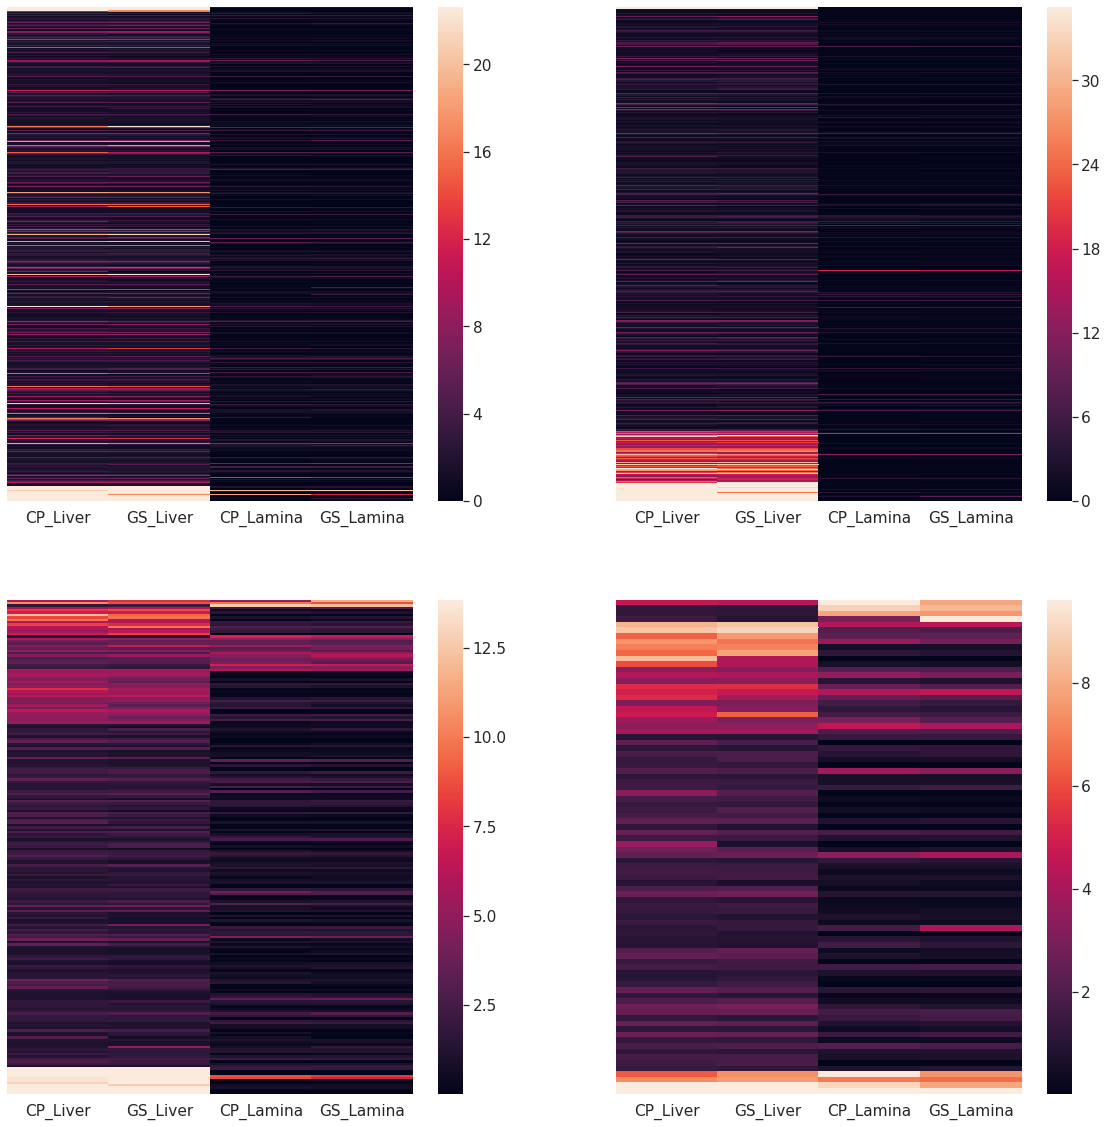

In [309]:
sb.set(font_scale=1.4)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (20,20))
plot_clustered_heatmap(liver_either_filtered, axes[0][0])
plot_clustered_heatmap(liver_both_filtered, axes[0][1])
plot_clustered_heatmap(lamina_either_filtered, axes[1][0])
plot_clustered_heatmap(lamina_both_filtered, axes[1][1])
for ax in axes.flat:
    ax.tick_params(left=False)
    ax.set_yticklabels("")
    ax.set_ylabel("")

In [102]:
gtf_ensemble = pd.read_csv("/home/pengsc/reference/equcab3/ensemble/Ensemble.Equus_caballus.EquCab3.0.99.sorted.ucscFormat.gtf", sep = '\t', comment = '#', 
                           names = ['chr', 'source', 'feature', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
genes = gtf_ensemble[gtf_ensemble['feature'] == 'gene']
genes['gene_id'] = genes['attributes'].str.split(';', expand =True)[0].str.split('\s', expand=True)[1].str.replace('\"', "")
genes['chrom'] = genes['chr']
genes

,chr,source,feature,start,end,score,strand,phase,attributes,gene_id,chrom
0,chr1,ensembl,gene,6434,15716,.,+,.,"gene_id ""ENSECAG00000012421""; gene_version ""3""...",ENSECAG00000012421,chr1
126,chr1,ensembl,gene,26839,72959,.,-,.,"gene_id ""ENSECAG00000017803""; gene_version ""3""...",ENSECAG00000017803,chr1
153,chr1,ensembl,gene,94837,96288,.,-,.,"gene_id ""ENSECAG00000032553""; gene_version ""1""...",ENSECAG00000032553,chr1
156,chr1,ensembl,gene,131451,143197,.,-,.,"gene_id ""ENSECAG00000019088""; gene_version ""3""...",ENSECAG00000019088,chr1
205,chr1,ensembl,gene,170978,171943,.,-,.,"gene_id ""ENSECAG00000004229""; gene_version ""2""...",ENSECAG00000004229,chr1
...,...,...,...,...,...,...,...,...,...,...,...
1319542,chrX,ensembl,gene,127892028,127949510,.,-,.,"gene_id ""ENSECAG00000012334""; gene_version ""3""...",ENSECAG00000012334,chrX
1319578,chrX,ensembl,gene,128021115,128026329,.,+,.,"gene_id ""ENSECAG00000027923""; gene_version ""1""...",ENSECAG00000027923,chrX
1319587,chrX,ensembl,gene,128081502,128082368,.,+,.,"gene_id ""ENSECAG00000002206""; gene_version ""2""...",ENSECAG00000002206,chrX
1319593,chrX,ensembl,gene,128150265,128151821,.,+,.,"gene_id ""ENSECAG00000030972""; gene_version ""1""...",ENSECAG00000030972,chrX


In [103]:
expression  = pd.read_csv("RNA_normalized_counts.csv", index_col = 0)
expression['Liver'] = (expression['686521_Liver'] + expression["683610_Liver"]) / 2
expression['Lamina'] = (expression['686521_Lamina'] + expression["683610_Lamina"]) / 2
expression = expression[['Liver', 'Lamina']]
expression

,Liver,Lamina
ENSECAG00000000003,7.569919,8.134911
ENSECAG00000000004,9.191215,7.966134
ENSECAG00000000005,10.009492,2.156466
ENSECAG00000000006,0.000000,0.667851
ENSECAG00000000007,9.834671,9.297223
...,...,...
ENSECAG00000043813,0.000000,0.000000
ENSECAG00000043814,0.000000,0.000000
ENSECAG00000043815,0.000000,0.000000
ENSECAG00000043816,0.000000,0.000000


In [104]:
promoters = genes[['chr', 'gene_id']]
promoters['start'] = np.where(genes['start'] - 1000 >= 0, genes['start'] - 1000, 0)
promoters['end'] = genes['start']
promoters = promoters[['chr', 'start', 'end', 'gene_id']]

In [105]:
pbt.helpers.cleanup()
chromatin_state = pd.DataFrame(columns = ['chr', 'start', 'end', 'gene_id']).set_index(['chr', 'start', 'end', 'gene_id'])
for i in peaks_df_filtered.keys():
    df_promoters_open = pbt.bedtool.BedTool.from_dataframe(promoters).intersect(pbt.bedtool.BedTool.from_dataframe(peaks_df_filtered[i]), u=True).to_dataframe(names = ['chr', 'start', 'end', 'gene_id'], index_col=False)
    df_promoters_open[i] = 1
    df_promoters_closed = pbt.bedtool.BedTool.from_dataframe(promoters).intersect(pbt.bedtool.BedTool.from_dataframe(peaks_df_filtered[i]), v=True).to_dataframe(names = ['chr', 'start', 'end', 'gene_id'], index_col=False)
    df_promoters_closed[i] = 0
    df = df_promoters_open.append(df_promoters_closed).set_index(['chr', 'start', 'end', 'gene_id'])
    chromatin_state = chromatin_state.merge(df, left_index = True, right_index = True, how = 'outer')
chromatin_state = chromatin_state[chromatin_state.index.get_level_values('gene_id').isin(list(expression.index))]
chromatin_state.columns = pd.Series(chromatin_state.columns).str.replace('CP', 'AH2').str.replace('GS', 'AH1')

In [106]:
sb.set(font_scale=2)
sb.set_style("white")

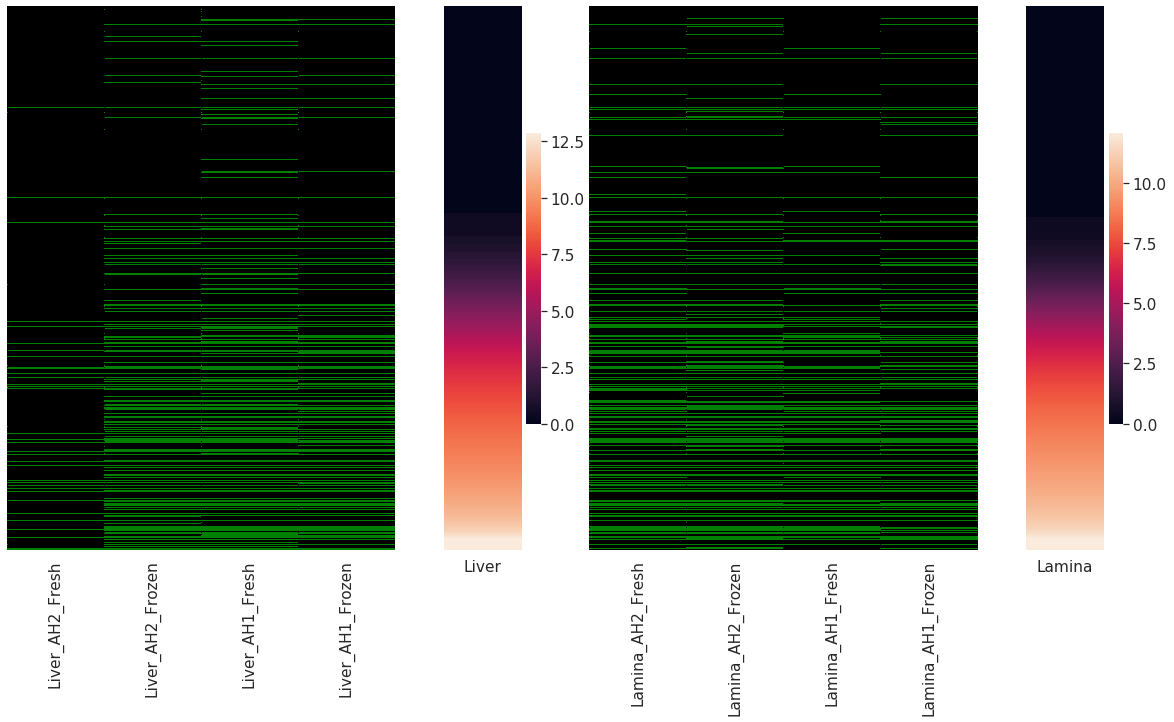

In [110]:
expression_liver = expression[['Liver']].sort_values(by = ['Liver'])
expression_lamina = expression[['Lamina']].sort_values(by = ['Lamina'])
chromatin_state_Liver = chromatin_state[['Liver_AH2_Fresh', 'Liver_AH2_Frozen', 'Liver_AH1_Fresh', 'Liver_AH1_Frozen']].reset_index().set_index(['gene_id']).reindex(list(expression_liver.index)).reset_index().set_index(['chr', 'start', 'end', 'gene_id'])
chromatin_state_Lamina = chromatin_state[['Lamina_AH2_Fresh', 'Lamina_AH2_Frozen', 'Lamina_AH1_Fresh', 'Lamina_AH1_Frozen']].reset_index().set_index(['gene_id']).reindex(list(expression_liver.index)).reset_index().set_index(['chr', 'start', 'end', 'gene_id'])
sb.set(font_scale=1.4)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize = (20,10), gridspec_kw={'width_ratios': [4, 1,4,1]})
#sb.heatmap(chromatin_state, ax = axes[0], cmap = ['black', 'green'], cbar_ax = fig.add_axes([.66, .75, .02, .10]))
sb.heatmap(chromatin_state_Liver, ax = axes[0], cmap = ['black', 'green'], cbar = False)
#colorbar = axes[0].collections[0].colorbar
#r = colorbar.vmax - colorbar.vmin 
#colorbar.set_ticks([colorbar.vmin + r / 2 * (0.5 + i) for i in range(2)])
#colorbar.set_ticklabels(['Closed', 'Open']) 
sb.heatmap(expression_liver, ax = axes[1], robust = True)
sb.heatmap(chromatin_state_Lamina, ax = axes[2], cmap = ['black', 'green'], cbar = False)
sb.heatmap(expression_lamina, ax = axes[3], robust = True)
for ax in axes:
    ax.tick_params(left=False)
    ax.set_yticklabels("")
    ax.set_ylabel("")
plt.show()